# Airline Arrivals Project

Use this dataset of airline arrival information to predict how late flights will be. A flight only counts as late if it is more than 30 minutes late.
    1. The project should follow guideline as previous projects.
    2. Apply models in Naïve Bayes, Logistic Regression, Decision Tree, Random Forest, Gradient Boosting and SVM.
    3. Apply PCA, SelectKBest and RFE for feature selections.
    4. Using gridsearchCV to obtain best parameters for models.
    5. Compare performances among models, write up analysis why the model is good or bad in the algorithmic approach (explain          why the algorithm is good or bad for the dataset structure, can you do something to improve the model?)
    6. Include the conclusions.

# I. Xử lý dữ liệu

## 1.Lấy dữ liệu 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import os

In [2]:
df=pd.read_csv("D:\\2008.csv")

In [3]:
df.shape

(7009728, 29)

In [4]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [5]:
df.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [6]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [7]:
df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [8]:
df.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               136246
CRSDepTime                 0
ArrTime               151649
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                83365
ActualElapsedTime     154699
CRSElapsedTime           844
AirTime               154699
ArrDelay              154699
DepDelay              136246
Origin                     0
Dest                       0
Distance                   0
TaxiIn                151649
TaxiOut               137058
Cancelled                  0
CancellationCode     6872294
Diverted                   0
CarrierDelay         5484993
WeatherDelay         5484993
NASDelay             5484993
SecurityDelay        5484993
LateAircraftDelay    5484993
dtype: int64

## 2.Phân tích dữ liệu

## a. Giảm số cột

- Loại bỏ những cột được cho là không liên quan 
    Những Feature đó không làm ảnh hưởng đến chuyến bay đó có trể hay không:
        Ví dụ rõ nhất là TaxiIn hay Out thì không thể làm chuyến bay có trể hay không.

In [9]:
df = df.drop(columns=['FlightNum','TailNum','AirTime','TaxiIn','TaxiOut','CancellationCode','Diverted','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis=1)

- Loại bỏ dòng có số lượng chuyến bay hủy >=1 "Cancelled"
    vì chuyến bay đã hủy thì không thể làm chuyến bay bị trể được.

In [10]:
df = df.drop(df.index[df["Cancelled"] != 0].tolist())

Sau khi xử lý xong dữ liệu Row của cột Cancelled tiến hành xóa cột.

In [11]:
df = df.drop('Cancelled',axis=1)

In [12]:
df.isnull().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime              14215
CRSArrTime               0
UniqueCarrier            0
ActualElapsedTime    17265
CRSElapsedTime         598
ArrDelay             17265
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
dtype: int64

## b. Xử lý giá trị Null

In [13]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,ActualElapsedTime,17265,99.748774
1,ArrDelay,17265,99.748774
2,ArrTime,14215,99.793155
3,CRSElapsedTime,598,99.991298
4,Year,0,100.000000
5,Month,0,100.000000
6,DayofMonth,0,100.000000
7,DayOfWeek,0,100.000000
8,DepTime,0,100.000000
9,CRSDepTime,0,100.000000


Dự trên kết quả sau ta thấy các cột có giá trị Null chiếm tỉ lệ rất nhỏ so với tập dữ liệu (0.2% ~ 0.3%)
    Vì vậy quyết định loại bỏ các Rows của dữ liệu có giá trị Null

In [14]:
df = df[df.ArrDelay.notnull()]

In [15]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,ArrDelay,DepDelay,Origin,Dest,Distance
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,128.0,150.0,-14.0,8.0,IAD,TPA,810
1,2008,1,3,4,754.0,735,1002.0,1000,WN,128.0,145.0,2.0,19.0,IAD,TPA,810
2,2008,1,3,4,628.0,620,804.0,750,WN,96.0,90.0,14.0,8.0,IND,BWI,515
3,2008,1,3,4,926.0,930,1054.0,1100,WN,88.0,90.0,-6.0,-4.0,IND,BWI,515
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,90.0,90.0,34.0,34.0,IND,BWI,515


In [16]:
## c. Biến đổi dữ liệu theo thời gian

In [17]:
import datetime
# Chuyển đổi thời gian từ định dạng 'hhmm' sang datetime để dễ xử lý
def Conver_hhmm(data):
    if pd.isnull(data):
        return np.nan
    else:
        if data == 2400: data = 0
        data = "{0:04d}".format(int(data))
        data = datetime.time(int(data[0:2]), int(data[2:4]))
        return data

In [18]:
# Thay đổi thời gian 2400 thành 0000
df.loc[(df['DepTime'] ==2400),'DepTime'] = "0000"
df.loc[(df['CRSDepTime'] ==2400),'CRSDepTime'] = "0000"
df.loc[(df['ArrTime'] ==2400),'ArrTime'] = "0000"
df.loc[(df['CRSArrTime'] ==2400),'CRSArrTime'] = "0000"

In [19]:
#Chuyển đổi lại các cột có giá trị ngày giờ: hhmm -> hh:mm
df['DepTime'] = (df['DepTime'].astype(int)/100).astype(int).astype(str) + ':' + (df['DepTime'].astype(int)%100).astype(int).astype(str)+ ':00'
df['CRSDepTime'] = (df['CRSDepTime'].astype(int)/100).astype(int).astype(str) + ':' + (df['CRSDepTime'].astype(int)%100).astype(int).astype(str)+ ':00'
df['ArrTime'] = (df['ArrTime'].astype(int)/100).astype(int).astype(str) + ':' + (df['ArrTime'].astype(int)%100).astype(int).astype(str)+ ':00'
df['CRSArrTime'] = (df['CRSArrTime'].astype(int)/100).astype(int).astype(str) + ':' + (df['CRSArrTime'].astype(int)%100).astype(int).astype(str)+ ':00'

In [20]:
def get_minustes(time_str):
    h, m, s = time_str.split(':')
    return int(h) * 60 + int(m)

Biến đổi dữ liệu sang phút

In [21]:
df['DepTime'] = df['DepTime'].apply(lambda x: get_minustes(x))

In [22]:
df['CRSDepTime'] = df['CRSDepTime'].apply(lambda x: get_minustes(x))
df['ArrTime'] = df['ArrTime'].apply(lambda x: get_minustes(x))
df['CRSArrTime'] = df['CRSArrTime'].apply(lambda x: get_minustes(x))

In [23]:
# Hàm tính số phút giữa hai mốc thời gian
def TimeSpan(Time1,Time2):
    TS = 0
    hm1 = Time1.split(':')
    hm2 = Time2.split(':')
    if(hm2[0] == hm1[0]):
        mmresult = abs(float(hm2[1])-float(hm1[1]))
    if(hm2[0] > hm1[0]):
        TS = float(hm2[0])*60  + float(hm2[1]) - float(hm1[0])*60-float(hm1[1])
    else:
        TS = (float(hm2[0]))*60  + float(hm2[1]) + (23-float(hm1[0]))*60+60-float(hm1[1])
    return TS

## d. Biến đổi dữ liệu

### - Tính trễ khi > 30 phút

In [24]:
# Biến đổi dữ liệu: Trễ = 1 , Không trễ = 0
df['ArrDelay'] = np.where(df['ArrDelay']>30, 1, 0)         

In [25]:
df.shape

(6855029, 16)

In [26]:
# Xem data Trễ
dfLate = df[df['ArrDelay'] ==1]
dfLate.shape

(901398, 16)

In [27]:
#df.to_csv("D:\\AirLineInfo2008.csv")

Text(0.5,1,'Đếm dữ liệu ArrDelay')

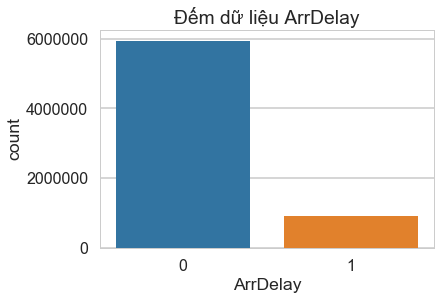

In [28]:
fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x='ArrDelay', data=df)
plt.title("Đếm dữ liệu ArrDelay")

Trên tập dữ liệu tỉ lệ chuyến bay trễ chiếm khoản 13.1%

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

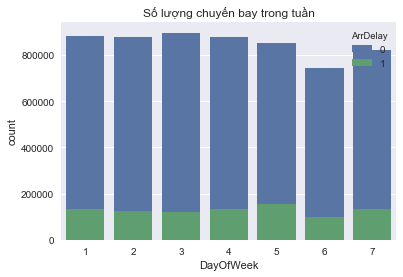

In [30]:
sns.set()
ax = sns.countplot(x='DayOfWeek',data=df,hue='ArrDelay',dodge=False)
ax.set_title('Số lượng chuyến bay trong tuần')
plt.show()

Dựa vào đồ thị cho thấy hầu như chuyến bay trễ qua các ngày trong tuần có biến đổi nhưng không đáng kể.
    Chỉ có ngày T6 là có biến động lớn: Do lượng khách hàng tăng đột biến và để chuẩn bị cho ngày nghĩ T7, CN.

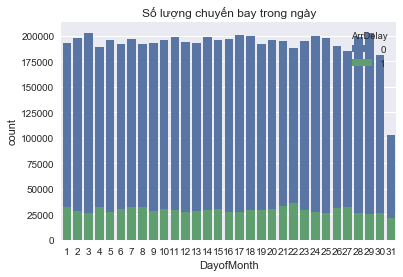

In [31]:
sns.set()
ax = sns.countplot(x='DayofMonth',data=df,hue='ArrDelay',dodge=False)
ax.set_title('Số lượng chuyến bay trong ngày')
plt.show()

Dựa vào đồ thị cho thấy hầu như chuyến bay trễ qua các ngày có biến đổi nhưng không đáng kể.

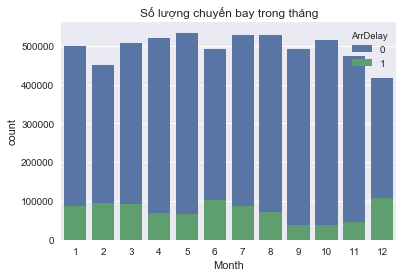

In [32]:
sns.set()
ax = sns.countplot(x='Month',data=df,hue='ArrDelay',dodge=False)
ax.set_title('Số lượng chuyến bay trong tháng')
plt.show()

Dựa vào đồ thị cho thấy chuyến bay trễ trong tháng biến động lớn đặt biệt ở tháng 6 và tháng 12.
    - Ở tháng 12 là thời gian cận tết nên việc đi lại và sắp xếp các phương tiện máy bay chuẩn bị đón tết nhiều có thể sãy ra tình trạng trễ.
    - ở tháng 6: Có thể do thời gian đi du lịch, nghĩ dưỡng nhiều số lượng tăng cao nên có thể dẫn đến trễ.

In [33]:
# Tổng hợp dữ liệu ngày, tháng, năm thành 1 cột

In [34]:
df['Day'] = df['DayofMonth']

In [35]:
df['DATE'] = pd.to_datetime(df[['Year','Month','Day']])

In [36]:
df = df.drop(columns=['Year','Month','Day','DayofMonth','DayOfWeek'], axis=1)

In [37]:
df.columns

Index(['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier',
       'ActualElapsedTime', 'CRSElapsedTime', 'ArrDelay', 'DepDelay', 'Origin',
       'Dest', 'Distance', 'DATE'],
      dtype='object')

In [38]:
df.dtypes

DepTime                       int64
CRSDepTime                    int64
ArrTime                       int64
CRSArrTime                    int64
UniqueCarrier                object
ActualElapsedTime           float64
CRSElapsedTime              float64
ArrDelay                      int32
DepDelay                    float64
Origin                       object
Dest                         object
Distance                      int64
DATE                 datetime64[ns]
dtype: object

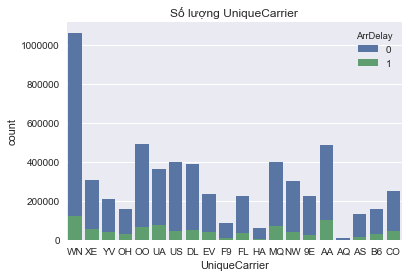

In [39]:
sns.set()
ax1 = sns.countplot(x='UniqueCarrier',data=df,hue='ArrDelay',dodge=False)
ax1.set_title('Số lượng UniqueCarrier')
plt.show()

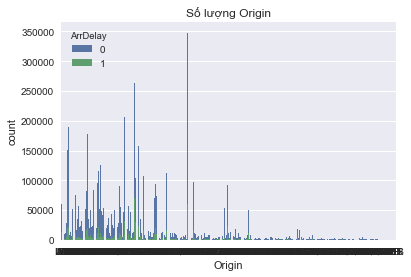

In [40]:
sns.set()
ax2 = sns.countplot(x='Origin',data=df,hue='ArrDelay',dodge=False)
ax2.set_title('Số lượng Origin')
plt.show()

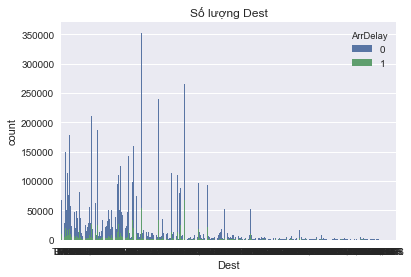

In [41]:
sns.set()
ax3 = sns.countplot(x='Dest',data=df,hue='ArrDelay',dodge=False)
ax3.set_title('Số lượng Dest')
plt.show()

In [42]:
### - Biến đổi LabelEncoder()


In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [44]:
df['UniqueCarrier'] = le.fit_transform(df['UniqueCarrier'])

In [45]:
df['Origin'] = le.fit_transform(df['Origin'])

In [46]:
df['Dest'] = le.fit_transform(df['Dest'])

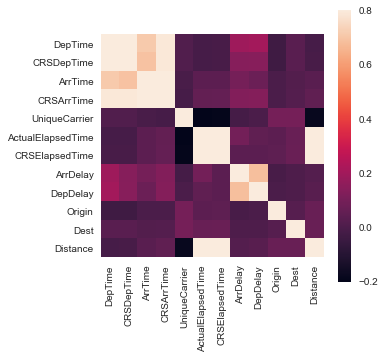

In [47]:
f0, ax0 = plt.subplots(figsize=(5, 5))
corrmat0 = df.corr()
sns.heatmap(corrmat0, vmax=0.8, square=True)
plt.show()

    - Ta thấy ArrDay có tương quan cao với DepDelay 
    - Xãy ra trường hợp đa cộng tuyến (Distance tương quan cao với AcctualElapsedTime và CRSElapsedTime

# II. Training

## 1. Biến đỗi dữ liêu

In [48]:
df.dtypes

DepTime                       int64
CRSDepTime                    int64
ArrTime                       int64
CRSArrTime                    int64
UniqueCarrier                 int64
ActualElapsedTime           float64
CRSElapsedTime              float64
ArrDelay                      int32
DepDelay                    float64
Origin                        int64
Dest                          int64
Distance                      int64
DATE                 datetime64[ns]
dtype: object

### - Tạo Full dữ liệu

#Tạo X_DataFull, y_DataFull là tập dữ liệu dùng để kiểm tra model trên tất cả dữ liệu

In [49]:
X_DataFull = df[['DepTime','CRSDepTime','ArrTime','CRSArrTime','UniqueCarrier','ActualElapsedTime','CRSElapsedTime','DepDelay','Origin','Dest','Distance']]

In [50]:
y_DataFull=df['ArrDelay']

### - Tạo dữ liệu mẫu

In [51]:
data = df.sample(frac=0.1, random_state=100)

In [52]:
data.shape

(685503, 13)

Text(0.5,1,'Đếm dữ liệu ArrDelay')

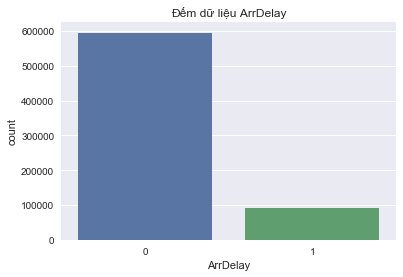

In [53]:
fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x='ArrDelay', data=data)
plt.title("Đếm dữ liệu ArrDelay")

In [54]:
#Tạo X, y là tập dữ liệu mẫu dùng để Training model

In [55]:
X=data[['DepTime','CRSDepTime','ArrTime','CRSArrTime','UniqueCarrier','ActualElapsedTime','CRSElapsedTime','DepDelay','Origin','Dest','Distance']]

In [56]:
y=data['ArrDelay']

In [57]:
print(X.shape, y.shape,X_DataFull.shape,y_DataFull.shape)

(685503, 11) (685503,) (6855029, 11) (6855029,)


### - Chia tập dữ liệu mẫu để Training và Test 

In [58]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [59]:
# Chia data thành 2 phần: training data, test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

## 2. Làm việc với Model 

### 2.1. Naive Bayes

#### a. Gaussian Naive Bayes và PCA 

In [60]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
#from sklearn.model_selection import train_test_split
import sklearn

C:\Users\vuong.huynh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\vuong.huynh\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Vì vậy thay vì lần lượt làm 3 công đoạn riêng.
Tạo 1 Pipeline có nhiệm vụ kết hợp 3 Object: StandardScaler, PCA, LogisticRegression.

In [61]:
pipe_lrNB = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=2)),('clfNB', GaussianNB())])

##### - Chưa Tuning

In [62]:
Fit_NB0 = pipe_lrNB.fit(X_train, y_train)

In [63]:
y_prNB0 = Fit_NB0.predict(X_test)

In [64]:
from sklearn.metrics import classification_report
NoTuning_NB_PCA=classification_report(y_test, y_prNB0)
print(NoTuning_NB_PCA)

             precision    recall  f1-score   support

          0       0.87      1.00      0.93    119083
          1       0.20      0.00      0.00     18018

avg / total       0.78      0.87      0.81    137101



##### + Tuning

In [65]:
parametersGauss = dict(pca__n_components=[1,5,7,10])

In [66]:
GSCV_GB = GridSearchCV(pipe_lrNB,param_grid=parametersGauss,refit = True, verbose=2)

In [67]:
GS_LNB1 = GSCV_GB.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] pca__n_components=1 .............................................
[CV] .................................... pca__n_components=1 -   1.6s
[CV] pca__n_components=1 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] .................................... pca__n_components=1 -   1.6s
[CV] pca__n_components=1 .............................................
[CV] .................................... pca__n_components=1 -   1.6s
[CV] pca__n_components=5 .............................................
[CV] .................................... pca__n_components=5 -   1.4s
[CV] pca__n_components=5 .............................................
[CV] .................................... pca__n_components=5 -   1.4s
[CV] pca__n_components=5 .............................................
[CV] .................................... pca__n_components=5 -   1.4s
[CV] pca__n_components=7 .............................................
[CV] .................................... pca__n_components=7 -   1.6s
[CV] pca__n_components=7 .............................................
[CV] .................................... pca__n_components=7 -   1.5s
[CV] pca__n_components=7 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   17.0s finished


In [68]:
KQ_GS_LNB1 = GS_LNB1.best_estimator_

In [69]:
print(KQ_GS_LNB1)

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clfNB', GaussianNB(priors=None))])


In [70]:
Fit_NB1 = KQ_GS_LNB1.fit(X_train, y_train)

In [71]:
y_prNB1 = Fit_NB1.predict(X_test)

In [72]:
from sklearn.metrics import classification_report
Tuning_NB_PCA=classification_report(y_test, y_prNB1)
print(Tuning_NB_PCA)

             precision    recall  f1-score   support

          0       0.92      0.99      0.96    119083
          1       0.93      0.47      0.62     18018

avg / total       0.93      0.93      0.91    137101



Với K = 10 tốt nhất đạt độ chính xác 90%

##### + Kiểm thử với dữ liệu Full data

In [73]:
y_prNB_Full = Fit_NB1.predict(X_DataFull)

In [74]:
from sklearn.metrics import classification_report
FullData_NB_PCA = classification_report(y_DataFull, y_prNB_Full)
print(FullData_NB_PCA)

             precision    recall  f1-score   support

          0       0.92      1.00      0.96   5953631
          1       0.93      0.47      0.62    901398

avg / total       0.93      0.93      0.91   6855029



#### b. Gaussian Naive Bayes và SelectKBest

In [75]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [76]:
k_filterNB = SelectKBest(f_regression, k=1)
pipe_lrNB_KB = Pipeline([('scl', StandardScaler()),('kbest', k_filterNB),('clfNB', GaussianNB())])
prNB_KB = pipe_lrNB_KB.fit(X_train, y_train)

##### - Kết quả Chưa Tuning

In [77]:
y_prNB_KB = prNB_KB.predict(X_test)
NoTuning_NB_KB = classification_report(y_test, y_prNB_KB)
print(NoTuning_NB_KB)

             precision    recall  f1-score   support

          0       0.97      0.97      0.97    119083
          1       0.83      0.81      0.82     18018

avg / total       0.95      0.95      0.95    137101



##### - Tuning

In [78]:
GSCV_GB_KB=GridSearchCV(pipe_lrNB_KB, {'kbest__k': [1,3,6,8,10]}, refit = True, verbose=2)

In [79]:
Fit_GB_KB = GSCV_GB_KB.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] kbest__k=1 ......................................................
[CV] ............................................. kbest__k=1 -   0.3s
[CV] kbest__k=1 ......................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ............................................. kbest__k=1 -   0.3s
[CV] kbest__k=1 ......................................................
[CV] ............................................. kbest__k=1 -   0.2s
[CV] kbest__k=3 ......................................................
[CV] ............................................. kbest__k=3 -   0.4s
[CV] kbest__k=3 ......................................................
[CV] ............................................. kbest__k=3 -   0.4s
[CV] kbest__k=3 ......................................................
[CV] ............................................. kbest__k=3 -   0.4s
[CV] kbest__k=6 ......................................................
[CV] ............................................. kbest__k=6 -   0.4s
[CV] kbest__k=6 ......................................................
[CV] ............................................. kbest__k=6 -   0.4s
[CV] kbest__k=6 ......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    7.7s finished


In [80]:
KQ_GS_NB_KB = Fit_GB_KB.best_estimator_

In [81]:
print(KQ_GS_NB_KB)

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kbest', SelectKBest(k=1, score_func=<function f_regression at 0x0000025BDC23EA60>)), ('clfNB', GaussianNB(priors=None))])


In [82]:
Fit_NB_KB1 = KQ_GS_NB_KB.fit(X_train, y_train)

In [83]:
y_prNB_KB1 = Fit_NB_KB1.predict(X_test)
Tuning_NB_KB = classification_report(y_test, y_prNB_KB1)
print(Tuning_NB_KB)

             precision    recall  f1-score   support

          0       0.97      0.97      0.97    119083
          1       0.83      0.81      0.82     18018

avg / total       0.95      0.95      0.95    137101



##### - Kiểm thử với dữ liệu Full data

In [84]:
y_prNB_KB_Full = Fit_NB_KB1.predict(X_DataFull)

In [85]:
from sklearn.metrics import classification_report
FullData_NB_KB = classification_report(y_DataFull, y_prNB_KB_Full)
print(FullData_NB_KB)

             precision    recall  f1-score   support

          0       0.97      0.97      0.97   5953631
          1       0.83      0.81      0.82    901398

avg / total       0.95      0.95      0.95   6855029



### 2.2. Logistic Regression

#### a. Logistic Regression

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

In [87]:
pipe_lr0 = Pipeline([('scl', StandardScaler()),('clf', LogisticRegression(random_state=100))])

##### - Chưa Tuning

In [88]:
prLR0 = pipe_lr0.fit(X_train, y_train)

In [89]:
y_prLR0=prLR0.predict(X_test)
from sklearn.metrics import classification_report
NoTuning_LR = classification_report(y_test, y_prLR0)
print(NoTuning_LR)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    119083
          1       1.00      1.00      1.00     18018

avg / total       1.00      1.00      1.00    137101



##### - Tuning

In [90]:
parametersLR0 = dict(clf__C=[0.1,0.3,0.5,0.8,1])
GSCV_LR0 = GridSearchCV(pipe_lr0,param_grid=parametersLR0,refit = True, verbose=2)
GSCV_FIT_LR0 = GSCV_LR0.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] clf__C=0.1 ......................................................
[CV] ............................................. clf__C=0.1 -   3.9s
[CV] clf__C=0.1 ......................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s


[CV] ............................................. clf__C=0.1 -   3.7s
[CV] clf__C=0.1 ......................................................
[CV] ............................................. clf__C=0.1 -   3.8s
[CV] clf__C=0.3 ......................................................
[CV] ............................................. clf__C=0.3 -   4.3s
[CV] clf__C=0.3 ......................................................
[CV] ............................................. clf__C=0.3 -   4.1s
[CV] clf__C=0.3 ......................................................
[CV] ............................................. clf__C=0.3 -   3.9s
[CV] clf__C=0.5 ......................................................
[CV] ............................................. clf__C=0.5 -   4.0s
[CV] clf__C=0.5 ......................................................
[CV] ............................................. clf__C=0.5 -   3.9s
[CV] clf__C=0.5 ......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.1min finished


In [91]:
KQ_GSCV_LR0 = GSCV_FIT_LR0.best_estimator_
print(KQ_GSCV_LR0)

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=100, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])


In [92]:
Fit_LR0 = KQ_GSCV_LR0.fit(X_train, y_train)
y_prLR_0 = Fit_LR0.predict(X_test)
Tuning_LR = classification_report(y_test, y_prLR_0)
print(Tuning_LR)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    119083
          1       1.00      1.00      1.00     18018

avg / total       1.00      1.00      1.00    137101



##### - Kiểm thử với dữ liệu Full data

In [93]:
y_prLR_Full = Fit_LR0.predict(X_DataFull)

In [94]:
from sklearn.metrics import classification_report
FullData_LR = classification_report(y_DataFull, y_prLR_Full)
print(FullData_LR)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00   5953631
          1       1.00      1.00      1.00    901398

avg / total       1.00      1.00      1.00   6855029



#### b. Logistic Regression và PCA 

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

Vì vậy thay vì lần lượt làm 3 công đoạn riêng.
Tạo 1 Pipeline có nhiệm vụ kết hợp 3 Object: StandardScaler, PCA, LogisticRegression.

In [96]:
pipe_lr1 = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=2)),('clf', LogisticRegression(random_state=100))])
prLR1 = pipe_lr1.fit(X_train, y_train)

##### - Chưa Tuning

In [97]:
y_prLR1=prLR1.predict(X_test)
from sklearn.metrics import classification_report
NoTuning_LR_PCA = classification_report(y_test, y_prLR1)
print(NoTuning_LR_PCA)

             precision    recall  f1-score   support

          0       0.87      1.00      0.93    119083
          1       0.00      0.00      0.00     18018

avg / total       0.75      0.87      0.81    137101



C:\Users\vuong.huynh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##### - Tuning

In [98]:
parametersLR1 = dict(pca__n_components=[1,5,7,10],clf__C=[0.1,0.3,0.5,0.8,1])
GSCV_LR1 = GridSearchCV(pipe_lr1,param_grid=parametersLR1,refit = True, verbose=2)
GSCV_FIT_LR1 = GSCV_LR1.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] clf__C=0.1, pca__n_components=1 .................................
[CV] ........................ clf__C=0.1, pca__n_components=1 -   1.9s
[CV] clf__C=0.1, pca__n_components=1 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ........................ clf__C=0.1, pca__n_components=1 -   2.2s
[CV] clf__C=0.1, pca__n_components=1 .................................
[CV] ........................ clf__C=0.1, pca__n_components=1 -   2.1s
[CV] clf__C=0.1, pca__n_components=5 .................................
[CV] ........................ clf__C=0.1, pca__n_components=5 -   2.6s
[CV] clf__C=0.1, pca__n_components=5 .................................
[CV] ........................ clf__C=0.1, pca__n_components=5 -   2.2s
[CV] clf__C=0.1, pca__n_components=5 .................................
[CV] ........................ clf__C=0.1, pca__n_components=5 -   2.2s
[CV] clf__C=0.1, pca__n_components=7 .................................
[CV] ........................ clf__C=0.1, pca__n_components=7 -   2.5s
[CV] clf__C=0.1, pca__n_components=7 .................................
[CV] ........................ clf__C=0.1, pca__n_components=7 -   2.6s
[CV] clf__C=0.1, pca__n_components=7 .................................
[CV] .

[CV] ......................... clf__C=1, pca__n_components=10 -   3.6s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  2.7min finished


In [99]:
KQ_GSCV_LR1 = GSCV_FIT_LR1.best_estimator_
print(KQ_GSCV_LR1)

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=100, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])


In [100]:
Fit_LR1 = KQ_GSCV_LR1.fit(X_train, y_train)
y_prLR_1 = Fit_LR1.predict(X_test)
Tuning_LR_PCA = classification_report(y_test, y_prLR_1)
print(Tuning_LR_PCA)

             precision    recall  f1-score   support

          0       0.98      0.99      0.98    119083
          1       0.92      0.87      0.90     18018

avg / total       0.97      0.97      0.97    137101



##### - Kiểm thử với dữ liệu Full data

In [101]:
y_prLR_Full_pca = Fit_LR1.predict(X_DataFull)
from sklearn.metrics import classification_report
FullData_LR_PCA = classification_report(y_DataFull, y_prLR_Full_pca)
print(FullData_LR_PCA)

             precision    recall  f1-score   support

          0       0.98      0.99      0.99   5953631
          1       0.92      0.87      0.90    901398

avg / total       0.97      0.97      0.97   6855029



#### c. Logistic Regression và SelectKBest

In [102]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

k_filter = SelectKBest(f_regression, k=11)
pipe_lr2 = Pipeline([('scl', StandardScaler()),('kbest', k_filter),('clf', LogisticRegression(random_state=100))])
prLR2 = pipe_lr2.fit(X_train, y_train)

##### - Chưa Tuning

In [103]:
y_prLR2=prLR2.predict(X_test)
NoTuning_LR_KB = classification_report(y_test, y_prLR2)
print(NoTuning_LR_KB)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    119083
          1       1.00      1.00      1.00     18018

avg / total       1.00      1.00      1.00    137101



##### Tuning

In [104]:
parametersLR_KB = dict(kbest__k=[1,3,6,8,10],clf__C=[0.1,0.3,0.5,0.8,1])
GSCV_LR_KB = GridSearchCV(pipe_lr2,param_grid=parametersLR_KB,refit = True, verbose=2)
GSCV_FIT_LR_KB = GSCV_LR_KB.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] clf__C=0.1, kbest__k=1 ..........................................
[CV] ................................. clf__C=0.1, kbest__k=1 -   0.8s
[CV] clf__C=0.1, kbest__k=1 ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ................................. clf__C=0.1, kbest__k=1 -   0.6s
[CV] clf__C=0.1, kbest__k=1 ..........................................
[CV] ................................. clf__C=0.1, kbest__k=1 -   0.7s
[CV] clf__C=0.1, kbest__k=3 ..........................................
[CV] ................................. clf__C=0.1, kbest__k=3 -   0.9s
[CV] clf__C=0.1, kbest__k=3 ..........................................
[CV] ................................. clf__C=0.1, kbest__k=3 -   0.9s
[CV] clf__C=0.1, kbest__k=3 ..........................................
[CV] ................................. clf__C=0.1, kbest__k=3 -   0.9s
[CV] clf__C=0.1, kbest__k=6 ..........................................
[CV] ................................. clf__C=0.1, kbest__k=6 -   1.6s
[CV] clf__C=0.1, kbest__k=6 ..........................................
[CV] ................................. clf__C=0.1, kbest__k=6 -   1.6s
[CV] clf__C=0.1, kbest__k=6 ..........................................
[CV] .

[CV] ................................ clf__C=0.8, kbest__k=10 -   4.6s
[CV] clf__C=1, kbest__k=1 ............................................
[CV] ................................... clf__C=1, kbest__k=1 -   0.6s
[CV] clf__C=1, kbest__k=1 ............................................
[CV] ................................... clf__C=1, kbest__k=1 -   0.7s
[CV] clf__C=1, kbest__k=1 ............................................
[CV] ................................... clf__C=1, kbest__k=1 -   0.7s
[CV] clf__C=1, kbest__k=3 ............................................
[CV] ................................... clf__C=1, kbest__k=3 -   0.9s
[CV] clf__C=1, kbest__k=3 ............................................
[CV] ................................... clf__C=1, kbest__k=3 -   1.0s
[CV] clf__C=1, kbest__k=3 ............................................
[CV] ................................... clf__C=1, kbest__k=3 -   1.1s
[CV] clf__C=1, kbest__k=6 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  2.7min finished


In [105]:
KQ_GSCV_LR_KB = GSCV_FIT_LR_KB.best_estimator_
print(KQ_GSCV_LR1)

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=100, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])


In [106]:
Fit_LR_KB = KQ_GSCV_LR_KB.fit(X_train, y_train)
y_prLR_KB1 = Fit_LR_KB.predict(X_test)
Tuning_LR_KB = classification_report(y_test, y_prLR_KB1)
print(Tuning_LR_KB)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    119083
          1       1.00      1.00      1.00     18018

avg / total       1.00      1.00      1.00    137101



##### - Kiểm thử với dữ liệu Full data

In [107]:
y_prLR_Full_KB = Fit_LR_KB.predict(X_DataFull)
from sklearn.metrics import classification_report
FullData_LR_KB = classification_report(y_DataFull, y_prLR_Full_KB)
print(FullData_LR_KB)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00   5953631
          1       1.00      1.00      1.00    901398

avg / total       1.00      1.00      1.00   6855029



### 2.3. Decision Tree

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

#### a. Sử dụng DecisionTree

In [109]:
pipe_DT0 = Pipeline([('scl', StandardScaler()),('clf_DT0', DecisionTreeClassifier())])

In [110]:
prDT0 = pipe_DT0.fit(X_train, y_train)

##### - Chưa Tuning

In [111]:
y_prDT0=prDT0.predict(X_test)
from sklearn.metrics import classification_report
NoTuning_DT = classification_report(y_test, y_prDT0)
print(NoTuning_DT)

             precision    recall  f1-score   support

          0       0.99      1.00      1.00    119083
          1       0.97      0.96      0.97     18018

avg / total       0.99      0.99      0.99    137101



In [112]:
##### - Tuning

In [113]:
parametersDT0 = dict(clf_DT0__max_depth=np.arange(1, 5, 2),clf_DT0__max_features=np.arange(1, 11, 2),
                     clf_DT0__min_samples_split=np.linspace(0.1, 0.5, 5, endpoint=True),clf_DT0__min_samples_leaf=np.arange(0.1,0.5,0.1))
GSCV_DT0 = GridSearchCV(pipe_DT0,param_grid=parametersDT0,refit = True, verbose=2)
GSCV_FIT_DT0 = GSCV_DT0.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=1, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.1 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=1, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.1 -   0.3s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=1, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=1, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.1 -   0.3s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=1, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.1 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=1, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.1 -   0.3s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=1, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.2 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=1, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.2 -   0.3s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=1, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.2 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=1, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.2 -   0.3s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=1, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.2 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_fea

[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=1, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.2 -   0.3s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=1, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.2 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=1, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.2 -   0.3s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=1, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.30000000000000004 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=1, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.30000000000000004 -   0.3s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=1, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.30000000000000004 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=1, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.3000000000

[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=3, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.30000000000000004 -   0.3s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=3, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.30000000000000004 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=3, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.30000000000000004 -   0.4s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=3, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.4 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=3, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.4 -   0.3s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=3, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.4 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=3, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.4 -   0.4s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=3, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0

[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=3, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.4 -   0.3s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=3, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.4 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=3, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.4 -   0.4s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=3, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.5 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=3, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.5 -   0.3s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=3, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.5 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=3, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.5 -   0.3s
[CV] clf_DT0__max_depth=1, clf_DT0__max_feature

[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=5, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.5 -   0.4s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=5, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.5 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=5, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.5 -   0.4s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=5, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.1 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=5, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.1 -   0.4s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=5, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.1 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=5, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.1 -   0.4s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=5, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.1 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_fea

[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=5, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.1 -   0.4s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=5, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.1 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=5, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.1 -   0.4s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=5, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.1 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=5, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.1 -   0.4s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=5, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.2 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=5, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.2 -   0.4s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=5, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.2 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_fea

[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=7, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.2 -   0.4s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=7, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.2 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=7, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.2 -   0.4s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=7, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.30000000000000004 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=7, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.30000000000000004 -   0.5s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=7, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.30000000000000004 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=7, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.30000000000000004 -   0.5s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=7, clf_DT0__min_samples_leaf=0.2, clf_DT0__min

[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=7, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.30000000000000004 -   0.4s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=7, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.30000000000000004 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=7, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.30000000000000004 -   0.4s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=7, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.30000000000000004 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=7, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.30000000000000004 -   0.5s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=7, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.4 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=7, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.4 -   0.4s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=7, clf_DT0__min_samples_leaf=0

[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=9, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.4 -   0.5s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=9, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.4 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=9, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.4 -   0.6s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=9, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.5 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=9, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.5 -   0.4s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=9, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.5 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=9, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.5 -   0.5s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=9, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.5 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_fea

[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=9, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.5 -   0.5s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=9, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.5 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=9, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.5 -   0.5s
[CV] clf_DT0__max_depth=1, clf_DT0__max_features=9, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.5 
[CV]  clf_DT0__max_depth=1, clf_DT0__max_features=9, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.5 -   0.5s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=1, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.1 
[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=1, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.1 -   0.4s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=1, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.1 
[CV]  clf_DT0__max_depth=3, clf_DT0__max_fea

[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=1, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.1 -   0.4s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=1, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.1 
[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=1, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.1 -   0.3s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=1, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.2 
[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=1, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.2 -   0.3s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=1, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.2 
[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=1, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.2 -   0.3s
[CV] clf_DT0__max_depth=3, clf_DT0__max_feature

[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=3, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.2 -   0.5s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=3, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.2 
[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=3, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.2 -   0.5s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=3, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.2 
[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=3, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.2 -   0.5s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=3, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.30000000000000004 
[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=3, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.30000000000000004 -   0.6s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=3, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.300000000000000

[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=3, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.30000000000000004 -   0.4s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=3, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.30000000000000004 
[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=3, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.30000000000000004 -   0.3s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=3, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.30000000000000004 
[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=3, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.30000000000000004 -   0.4s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=3, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.4 
[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=3, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0

[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=5, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.4 -   0.5s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=5, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.4 
[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=5, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.4 -   0.7s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=5, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.4 
[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=5, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.4 -   0.5s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=5, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.5 
[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=5, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.5 -   0.4s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=5, clf_DT0__min_samples_leaf=0.1, clf_DT0__min_samples_split=0.5 
[CV]  clf_DT0__max_depth=3, clf_DT0__max_fea

[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=5, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.4 -   0.5s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=5, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.5 
[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=5, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.5 -   0.6s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=5, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.5 
[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=5, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.5 -   0.5s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=5, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.5 
[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=5, clf_DT0__min_samples_leaf=0.30000000000000004, clf_DT0__min_samples_split=0.5 -   0.5s
[CV] clf_DT0__max_depth=3, clf_DT0__max_feature

[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=7, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.1 -   0.6s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=7, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.1 
[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=7, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.1 -   0.8s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=7, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.1 
[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=7, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.1 -   0.7s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=7, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.2 
[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=7, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.2 -   0.6s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=7, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.2 
[CV]  clf_DT0__max_depth=3, clf_DT0__max_fea

[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=7, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.1 -   0.4s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=7, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.2 
[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=7, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.2 -   0.4s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=7, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.2 
[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=7, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.2 -   0.5s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=7, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.2 
[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=7, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.2 -   0.4s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=7, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.30000000000000004 
[CV]  clf_DT0__max_depth=3, 

[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=9, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.30000000000000004 -   0.8s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=9, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.30000000000000004 
[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=9, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.30000000000000004 -   0.8s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=9, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.30000000000000004 
[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=9, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.30000000000000004 -   0.9s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=9, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.4 
[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=9, clf_DT0__min_samples_leaf=0.2, clf_DT0__min_samples_split=0.4 -   0.8s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=9, clf_DT0__min_samples_leaf=0

[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=9, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.30000000000000004 -   0.5s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=9, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.4 
[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=9, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.4 -   0.5s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=9, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.4 
[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=9, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.4 -   0.5s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=9, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.4 
[CV]  clf_DT0__max_depth=3, clf_DT0__max_features=9, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.4 -   0.6s
[CV] clf_DT0__max_depth=3, clf_DT0__max_features=9, clf_DT0__min_samples_leaf=0.4, clf_DT0__min_samples_split=0.5 
[CV]  clf_DT0__max_depth=3, 

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  5.7min finished


In [114]:
KQ_GSCV_DT0 = GSCV_FIT_DT0.best_estimator_
print(KQ_GSCV_DT0)

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf_DT0', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=0.1,
            min_samples_split=0.4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))])


In [115]:
Fit_DT0 = KQ_GSCV_DT0.fit(X_train, y_train)
y_prDT_0 = Fit_DT0.predict(X_test)
Tuning_DT = classification_report(y_test, y_prDT_0)
print(Tuning_DT)

             precision    recall  f1-score   support

          0       0.87      1.00      0.93    119083
          1       0.00      0.00      0.00     18018

avg / total       0.75      0.87      0.81    137101



C:\Users\vuong.huynh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##### - Kiểm thử với dữ liệu Full data

In [116]:
y_prDT_Full = Fit_DT0.predict(X_DataFull)
from sklearn.metrics import classification_report
FullData_DT = classification_report(y_DataFull, y_prDT_Full)
print(FullData_DT)

             precision    recall  f1-score   support

          0       0.87      1.00      0.93   5953631
          1       0.00      0.00      0.00    901398

avg / total       0.75      0.87      0.81   6855029



C:\Users\vuong.huynh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [117]:
FullData_DT[199:203]

'0.81'

#### b. Sử dụng DecisionTree và PCA

In [118]:
pipe_DT1 = Pipeline([('scl', StandardScaler()),('pca_DT', PCA(n_components=2)),('clf_DT', DecisionTreeClassifier(random_state=100))])
prDT_PCA = pipe_DT1.fit(X_train, y_train)

##### -Chưa Tuning

In [119]:
y_prDT_PCA=prDT_PCA.predict(X_test)
from sklearn.metrics import classification_report
NoTuning_DT_PCA = classification_report(y_test, y_prDT_PCA)
print(NoTuning_DT)

             precision    recall  f1-score   support

          0       0.99      1.00      1.00    119083
          1       0.97      0.96      0.97     18018

avg / total       0.99      0.99      0.99    137101



##### - Tuning

In [124]:
parametersDT1 = dict(pca_DT__n_components=[1,5,7,10],clf_DT__max_depth=np.arange(1, 5, 2),
                     clf_DT__min_samples_split=np.linspace(0.1, 0.5, 5, endpoint=True),clf_DT__min_samples_leaf=np.arange(0.1,0.5,0.1))
GSCV_DT1 = GridSearchCV(pipe_DT1,param_grid=parametersDT1,refit = True, verbose=2)


In [125]:
GSCV_FIT_DT1 = GSCV_DT1.fit(X_train, y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.1, pca_DT__n_components=1 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.1, pca_DT__n_components=1 -   1.7s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.1, pca_DT__n_components=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.1, pca_DT__n_components=1 -   1.7s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.1, pca_DT__n_components=1 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.1, pca_DT__n_components=1 -   1.6s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.1, pca_DT__n_components=5 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.1, pca_DT__n_components=5 -   1.8s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.1, pca_DT__n_components=5 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.1, pca_DT__n_components=5 -   1.8s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.1, pca_DT__n_components=5 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples

[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.30000000000000004, pca_DT__n_components=10 -   1.3s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.4, pca_DT__n_components=1 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.4, pca_DT__n_components=1 -   1.7s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.4, pca_DT__n_components=1 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.4, pca_DT__n_components=1 -   1.7s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.4, pca_DT__n_components=1 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.4, pca_DT__n_components=1 -   1.7s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.4, pca_DT__n_components=5 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, cl

[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.1, pca_DT__n_components=10 -   1.3s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.2, pca_DT__n_components=1 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.2, pca_DT__n_components=1 -   1.7s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.2, pca_DT__n_components=1 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.2, pca_DT__n_components=1 -   1.7s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.2, pca_DT__n_components=1 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.2, pca_DT__n_components=1 -   1.7s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.2, pca_DT__n_components=5 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_sample

[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.4, pca_DT__n_components=10 -   1.3s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.4, pca_DT__n_components=10 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.4, pca_DT__n_components=10 -   1.2s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.4, pca_DT__n_components=10 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.4, pca_DT__n_components=10 -   1.3s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.5, pca_DT__n_components=1 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.5, pca_DT__n_components=1 -   1.7s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.5, pca_DT__n_components=1 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_sa

[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.2, pca_DT__n_components=7 -   1.8s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.2, pca_DT__n_components=7 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.2, pca_DT__n_components=7 -   1.8s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.2, pca_DT__n_components=7 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.2, pca_DT__n_components=7 -   1.8s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.2, pca_DT__n_components=10 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.2, pca_DT__n_components=10 -   1.3s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, c

[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.5, pca_DT__n_components=1 -   1.7s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.5, pca_DT__n_components=1 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.5, pca_DT__n_components=1 -   1.9s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.5, pca_DT__n_components=1 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.5, pca_DT__n_components=1 -   1.8s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.5, pca_DT__n_components=5 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.5, pca_DT__n_components=5 -   1.7s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf

[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.2, pca_DT__n_components=10 -   1.2s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.2, pca_DT__n_components=10 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.2, pca_DT__n_components=10 -   1.2s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.30000000000000004, pca_DT__n_components=1 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.30000000000000004, pca_DT__n_components=1 -   1.6s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.30000000000000004, pca_DT__n_components=1 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.30000000000000004, pca_DT__n_components=1 -   1.7s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.30000000000000004, pca_DT__n_compone

[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.5, pca_DT__n_components=7 -   1.8s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.5, pca_DT__n_components=10 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.5, pca_DT__n_components=10 -   1.3s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.5, pca_DT__n_components=10 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.5, pca_DT__n_components=10 -   1.2s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.5, pca_DT__n_components=10 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.5, pca_DT__n_components=10 -   1.1s
[CV] clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.1, pca_DT__n_components=1 
[CV]  clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.1, clf_DT__min_s

[CV]  clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.30000000000000004, pca_DT__n_components=7 -   2.3s
[CV] clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.30000000000000004, pca_DT__n_components=7 
[CV]  clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.30000000000000004, pca_DT__n_components=7 -   2.1s
[CV] clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.30000000000000004, pca_DT__n_components=10 
[CV]  clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.30000000000000004, pca_DT__n_components=10 -   1.9s
[CV] clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.30000000000000004, pca_DT__n_components=10 
[CV]  clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.30000000000000004, pca_DT__n_components=10 -   1.9s
[CV] clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.1, clf_DT__min_sam

[CV]  clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.1, pca_DT__n_components=7 -   1.9s
[CV] clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.1, pca_DT__n_components=7 
[CV]  clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.1, pca_DT__n_components=7 -   2.1s
[CV] clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.1, pca_DT__n_components=7 
[CV]  clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.1, pca_DT__n_components=7 -   2.0s
[CV] clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.1, pca_DT__n_components=10 
[CV]  clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.1, pca_DT__n_components=10 -   1.5s
[CV] clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.1, pca_DT__n_components=10 
[CV]  clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.2, clf_DT__min_samp

[CV]  clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.4, pca_DT__n_components=5 -   1.6s
[CV] clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.4, pca_DT__n_components=5 
[CV]  clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.4, pca_DT__n_components=5 -   1.6s
[CV] clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.4, pca_DT__n_components=7 
[CV]  clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.4, pca_DT__n_components=7 -   1.9s
[CV] clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.4, pca_DT__n_components=7 
[CV]  clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.4, pca_DT__n_components=7 -   1.9s
[CV] clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.4, pca_DT__n_components=7 
[CV]  clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples

[CV]  clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.2, pca_DT__n_components=1 -   1.4s
[CV] clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.2, pca_DT__n_components=5 
[CV]  clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.2, pca_DT__n_components=5 -   1.4s
[CV] clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.2, pca_DT__n_components=5 
[CV]  clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.2, pca_DT__n_components=5 -   1.4s
[CV] clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.2, pca_DT__n_components=5 
[CV]  clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.2, pca_DT__n_components=5 -   1.4s
[CV] clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.30000000000000004, clf

[CV]  clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.4, pca_DT__n_components=7 -   1.6s
[CV] clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.4, pca_DT__n_components=10 
[CV]  clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.4, pca_DT__n_components=10 -   1.1s
[CV] clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.4, pca_DT__n_components=10 
[CV]  clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.4, pca_DT__n_components=10 -   1.2s
[CV] clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.4, pca_DT__n_components=10 
[CV]  clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.4, pca_DT__n_components=10 -   1.1s
[CV] clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.3000000000000000

[CV]  clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.2, pca_DT__n_components=7 -   1.4s
[CV] clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.2, pca_DT__n_components=7 
[CV]  clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.2, pca_DT__n_components=7 -   1.4s
[CV] clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.2, pca_DT__n_components=7 
[CV]  clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.2, pca_DT__n_components=7 -   1.4s
[CV] clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.2, pca_DT__n_components=10 
[CV]  clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.2, pca_DT__n_components=10 -   0.8s
[CV] clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.2, pca_DT__n_components=10 
[CV]  clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.4, clf_DT__min_samp

[CV]  clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.5, pca_DT__n_components=5 -   1.3s
[CV] clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.5, pca_DT__n_components=5 
[CV]  clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.5, pca_DT__n_components=5 -   1.3s
[CV] clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.5, pca_DT__n_components=7 
[CV]  clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.5, pca_DT__n_components=7 -   1.4s
[CV] clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.5, pca_DT__n_components=7 
[CV]  clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.5, pca_DT__n_components=7 -   1.4s
[CV] clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.5, pca_DT__n_components=7 
[CV]  clf_DT__max_depth=3, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed: 13.7min finished


In [126]:
KQ_GSCV_DT1 = GSCV_FIT_DT1.best_estimator_
print(KQ_GSCV_DT1)

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca_DT', PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf_DT', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
           ...       min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'))])


In [127]:
Fit_DT1 = KQ_GSCV_DT1.fit(X_train, y_train)
y_prDT_1 = Fit_DT1.predict(X_test)
Tuning_DT_PCA = classification_report(y_test, y_prDT_1)
print(Tuning_DT)

             precision    recall  f1-score   support

          0       0.87      1.00      0.93    119083
          1       0.00      0.00      0.00     18018

avg / total       0.75      0.87      0.81    137101



In [128]:
##### - Kiểm thử với dữ liệu Full data

In [129]:
y_prDT_Full_pca = Fit_DT1.predict(X_DataFull)
from sklearn.metrics import classification_report
FullData_DT_PCA = classification_report(y_DataFull, y_prLR_Full_pca)
print(FullData_DT_PCA)

             precision    recall  f1-score   support

          0       0.98      0.99      0.99   5953631
          1       0.92      0.87      0.90    901398

avg / total       0.97      0.97      0.97   6855029



#### c. DecisionTree và SelectKBest

In [130]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

k_filterDT = SelectKBest(f_regression, k=1)
pipe_DT2 = Pipeline([('scl', StandardScaler()),('kbest_DT', k_filterDT),('clf_DT', DecisionTreeClassifier(random_state=100))])
prDT2 = pipe_DT2.fit(X_train, y_train)

##### - Chưa Tuning

In [131]:
y_prDT2 = prDT2.predict(X_test)
NoTuning_DT_KB = classification_report(y_test, y_prDT2)
print(NoTuning_DT_KB)

             precision    recall  f1-score   support

          0       0.96      0.99      0.98    119083
          1       0.92      0.75      0.82     18018

avg / total       0.96      0.96      0.96    137101



##### -Tuning

In [133]:
parametersDT_KB = dict(kbest_DT__k=[1,3,6,8,10],clf_DT__max_depth=np.arange(1, 10, 3),
                     clf_DT__min_samples_split=np.linspace(0.1, 0.5, 5, endpoint=True),clf_DT__min_samples_leaf=np.arange(0.1,0.5,0.1))
GSCV_DT_KB = GridSearchCV(pipe_DT2,param_grid=parametersDT_KB,refit = True, verbose=2)
GSCV_FIT_DT_KB = GSCV_DT_KB.fit(X_train, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.1, kbest_DT__k=1 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.1, kbest_DT__k=1 -   0.2s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.1, kbest_DT__k=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.1, kbest_DT__k=1 -   0.3s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.1, kbest_DT__k=1 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.1, kbest_DT__k=1 -   0.2s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.1, kbest_DT__k=3 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.1, kbest_DT__k=3 -   0.3s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.1, kbest_DT__k=3 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.1, kbest_DT__k=3 -   0.3s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.1, kbest_DT__k=3 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.1, kbest_DT__k=3 -   0.3s
[CV] clf_DT__max_depth=1, clf_DT__min

[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=8 -   0.4s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=8 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=8 -   0.4s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=8 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=8 -   0.4s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=10 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=10 -   0.4s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=10 
[CV]  clf_DT__max

[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.1, kbest_DT__k=1 -   0.2s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.1, kbest_DT__k=3 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.1, kbest_DT__k=3 -   0.2s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.1, kbest_DT__k=3 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.1, kbest_DT__k=3 -   0.3s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.1, kbest_DT__k=3 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.1, kbest_DT__k=3 -   0.3s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.1, kbest_DT__k=6 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.1, kbest_DT__k=6 -   0.3s
[CV] clf_DT__max_depth=1, clf_DT__min

[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=8 -   0.4s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=8 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=8 -   0.4s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=8 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=8 -   0.4s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=10 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=10 -   0.5s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=10 
[CV]  clf_DT__max

[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.1, kbest_DT__k=1 -   0.2s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.1, kbest_DT__k=3 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.1, kbest_DT__k=3 -   0.3s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.1, kbest_DT__k=3 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.1, kbest_DT__k=3 -   0.3s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.1, kbest_DT__k=3 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.1, kbest_DT__k=3 -   0.3s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.1, kbest_DT__k=6 
[CV]  clf_DT__max_de

[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=3 -   0.3s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=6 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=6 -   0.3s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=6 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=6 -   0.3s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=6 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=6 -   0.3s
[CV] clf_DT__max_depth=1, 

[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.5, kbest_DT__k=6 -   0.3s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.5, kbest_DT__k=8 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.5, kbest_DT__k=8 -   0.4s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.5, kbest_DT__k=8 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.5, kbest_DT__k=8 -   0.4s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.5, kbest_DT__k=8 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.5, kbest_DT__k=8 -   0.4s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.5, kbest_DT__k=10 
[CV]  clf_DT__max_d

[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=1 -   0.2s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=1 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=1 -   0.2s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=3 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=3 -   0.3s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=3 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=3 -   0.3s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=3 
[CV]  clf_DT__max_de

[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.5, kbest_DT__k=6 -   0.3s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.5, kbest_DT__k=8 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.5, kbest_DT__k=8 -   0.4s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.5, kbest_DT__k=8 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.5, kbest_DT__k=8 -   0.4s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.5, kbest_DT__k=8 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.5, kbest_DT__k=8 -   0.4s
[CV] clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.5, kbest_DT__k=10 
[CV]  clf_DT__max_depth=1, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.5, kbest_DT__k=10 -   0.4s
[CV] clf_DT__max_depth=1, clf_DT__m

[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=1 -   0.2s
[CV] clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=3 
[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=3 -   0.4s
[CV] clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=3 
[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=3 -   0.4s
[CV] clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=3 
[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=3 -   0.4s
[CV] clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=6 
[CV]  clf_DT__max_de

[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.5, kbest_DT__k=8 -   0.7s
[CV] clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.5, kbest_DT__k=8 
[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.5, kbest_DT__k=8 -   0.7s
[CV] clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.5, kbest_DT__k=8 
[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.5, kbest_DT__k=8 -   0.7s
[CV] clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.5, kbest_DT__k=10 
[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.5, kbest_DT__k=10 -   0.8s
[CV] clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.5, kbest_DT__k=10 
[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.5, kbest_DT__k=10 -   0.8s
[CV] clf_DT__max_depth=4, clf_DT_

[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=3 -   0.3s
[CV] clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=3 
[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=3 -   0.3s
[CV] clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=3 
[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=3 -   0.3s
[CV] clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=6 
[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=6 -   0.5s
[CV] clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=6 
[CV]  clf_DT__max_de

[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.5, kbest_DT__k=8 -   0.6s
[CV] clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.5, kbest_DT__k=8 
[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.5, kbest_DT__k=8 -   0.6s
[CV] clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.5, kbest_DT__k=10 
[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.5, kbest_DT__k=10 -   0.6s
[CV] clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.5, kbest_DT__k=10 
[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.5, kbest_DT__k=10 -   0.6s
[CV] clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.5, kbest_DT__k=10 
[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.5, kbest_DT__k=10 -   0.7s
[CV] clf_DT__max_depth=4, clf_D

[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.2, kbest_DT__k=10 -   0.5s
[CV] clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=1 
[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=1 -   0.2s
[CV] clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=1 
[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=1 -   0.2s
[CV] clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=1 
[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.30000000000000004, kbest_DT__k=1 -   0.2s
[CV] clf_DT__max_depth=4, clf_DT__min_sam

[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.5, kbest_DT__k=1 -   0.2s
[CV] clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.5, kbest_DT__k=1 
[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.5, kbest_DT__k=1 -   0.2s
[CV] clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.5, kbest_DT__k=3 
[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.5, kbest_DT__k=3 -   0.3s
[CV] clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.5, kbest_DT__k=3 
[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.5, kbest_DT__k=3 -   0.3s
[CV] clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.5, kbest_DT__k=3 
[CV]  clf_DT__max_de

[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.2, kbest_DT__k=6 -   0.3s
[CV] clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.2, kbest_DT__k=8 
[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.2, kbest_DT__k=8 -   0.4s
[CV] clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.2, kbest_DT__k=8 
[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.2, kbest_DT__k=8 -   0.4s
[CV] clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.2, kbest_DT__k=8 
[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.2, kbest_DT__k=8 -   0.4s
[CV] clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.2, kbest_DT__k=10 
[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.2, kbest_DT__k=10 -   0.4s
[CV] clf_DT__max_depth=4, clf_DT__m

[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.5, kbest_DT__k=1 -   0.2s
[CV] clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.5, kbest_DT__k=1 
[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.5, kbest_DT__k=1 -   0.2s
[CV] clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.5, kbest_DT__k=1 
[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.5, kbest_DT__k=1 -   0.2s
[CV] clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.5, kbest_DT__k=3 
[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.5, kbest_DT__k=3 -   0.3s
[CV] clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.5, kbest_DT__k=3 
[CV]  clf_DT__max_depth=4, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.5, kbest_DT__k=3 -   0.3s
[CV] clf_DT__max_depth=4, clf_DT__min

[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.2, kbest_DT__k=8 -   0.8s
[CV] clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.2, kbest_DT__k=8 
[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.2, kbest_DT__k=8 -   0.8s
[CV] clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.2, kbest_DT__k=8 
[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.2, kbest_DT__k=8 -   0.8s
[CV] clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.2, kbest_DT__k=10 
[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.2, kbest_DT__k=10 -   1.0s
[CV] clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.2, kbest_DT__k=10 
[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.2, kbest_DT__k=10 -   1.0s
[CV] clf_DT__max_depth=7, clf_DT_

[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.5, kbest_DT__k=1 -   0.2s
[CV] clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.5, kbest_DT__k=1 
[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.5, kbest_DT__k=1 -   0.2s
[CV] clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.5, kbest_DT__k=3 
[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.5, kbest_DT__k=3 -   0.4s
[CV] clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.5, kbest_DT__k=3 
[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.5, kbest_DT__k=3 -   0.4s
[CV] clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.5, kbest_DT__k=3 
[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.1, clf_DT__min_samples_split=0.5, kbest_DT__k=3 -   0.4s
[CV] clf_DT__max_depth=7, clf_DT__min

[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.2, kbest_DT__k=8 -   0.5s
[CV] clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.2, kbest_DT__k=8 
[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.2, kbest_DT__k=8 -   0.6s
[CV] clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.2, kbest_DT__k=10 
[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.2, kbest_DT__k=10 -   0.6s
[CV] clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.2, kbest_DT__k=10 
[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.2, kbest_DT__k=10 -   0.6s
[CV] clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.2, kbest_DT__k=10 
[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.2, kbest_DT__k=10 -   0.6s
[CV] clf_DT__max_depth=7, clf_D

[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.5, kbest_DT__k=1 -   0.2s
[CV] clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.5, kbest_DT__k=3 
[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.5, kbest_DT__k=3 -   0.4s
[CV] clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.5, kbest_DT__k=3 
[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.5, kbest_DT__k=3 -   0.3s
[CV] clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.5, kbest_DT__k=3 
[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.5, kbest_DT__k=3 -   0.4s
[CV] clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.5, kbest_DT__k=6 
[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.2, clf_DT__min_samples_split=0.5, kbest_DT__k=6 -   0.5s
[CV] clf_DT__max_depth=7, clf_DT__min

[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.2, kbest_DT__k=6 -   0.4s
[CV] clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.2, kbest_DT__k=8 
[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.2, kbest_DT__k=8 -   0.4s
[CV] clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.2, kbest_DT__k=8 
[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.2, kbest_DT__k=8 -   0.5s
[CV] clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.2, kbest_DT__k=8 
[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.2, kbest_DT__k=8 -   0.5s
[CV] clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.2, kbest_DT__k=10 
[CV]  clf_DT__max_d

[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.4, kbest_DT__k=8 -   0.5s
[CV] clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.4, kbest_DT__k=8 
[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.4, kbest_DT__k=8 -   0.5s
[CV] clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.4, kbest_DT__k=10 
[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.4, kbest_DT__k=10 -   0.5s
[CV] clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.4, kbest_DT__k=10 
[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.4, kbest_DT__k=10 -   0.5s
[CV] clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.30000000000000004, clf_DT__min_samples_split=0.4, kbest_DT__k=10 
[CV]  clf_DT__m

[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.2, kbest_DT__k=1 -   0.2s
[CV] clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.2, kbest_DT__k=1 
[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.2, kbest_DT__k=1 -   0.2s
[CV] clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.2, kbest_DT__k=3 
[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.2, kbest_DT__k=3 -   0.3s
[CV] clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.2, kbest_DT__k=3 
[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.2, kbest_DT__k=3 -   0.3s
[CV] clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.2, kbest_DT__k=3 
[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.2, kbest_DT__k=3 -   0.2s
[CV] clf_DT__max_depth=7, clf_DT__min

[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.4, kbest_DT__k=6 -   0.4s
[CV] clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.4, kbest_DT__k=8 
[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.4, kbest_DT__k=8 -   0.4s
[CV] clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.4, kbest_DT__k=8 
[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.4, kbest_DT__k=8 -   0.4s
[CV] clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.4, kbest_DT__k=8 
[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.4, kbest_DT__k=8 -   0.4s
[CV] clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.4, kbest_DT__k=10 
[CV]  clf_DT__max_depth=7, clf_DT__min_samples_leaf=0.4, clf_DT__min_samples_split=0.4, kbest_DT__k=10 -   0.4s
[CV] clf_DT__max_depth=7, clf_DT__m

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:  7.6min finished


In [134]:
KQ_GSCV_DT_KB = GSCV_FIT_DT_KB.best_estimator_
print(KQ_GSCV_DT_KB)

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kbest_DT', SelectKBest(k=1, score_func=<function f_regression at 0x0000025BDC23EA60>)), ('clf_DT', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
...       min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'))])


In [138]:
Fit_DT_KB = KQ_GSCV_DT_KB.fit(X_train, y_train)
y_prDT_KB1 = Fit_DT_KB.predict(X_test)
Tuning_DT_KB = classification_report(y_test, y_prDT_KB1)
print(Tuning_DT_KB)

             precision    recall  f1-score   support

          0       0.96      0.99      0.98    119083
          1       0.91      0.76      0.83     18018

avg / total       0.96      0.96      0.96    137101



#### - Kiểm thử với dữ liệu Full data

In [140]:
y_prDT_KB_Full = Fit_DT_KB.predict(X_DataFull)
FullData_DT_KB = classification_report(y_DataFull, y_prDT_KB_Full)
print(FullData_DT_KB)

             precision    recall  f1-score   support

          0       0.96      0.99      0.98   5953631
          1       0.91      0.76      0.83    901398

avg / total       0.96      0.96      0.96   6855029



### 2.4. Random Forest

#### a. Sử dụng Model Random Forest

In [141]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [142]:
pipe_RF = Pipeline([('scl', StandardScaler()),('clfRF', RandomForestClassifier())])
prRF = pipe_RF.fit(X_train, y_train)

##### - Chưa tuning

In [143]:
y_prRF=prRF.predict(X_test)

In [144]:
from sklearn.metrics import classification_report
NoTuning_RF = classification_report(y_test, y_prRF)
print(NoTuning_RF)

             precision    recall  f1-score   support

          0       0.99      1.00      0.99    119083
          1       0.97      0.90      0.93     18018

avg / total       0.98      0.98      0.98    137101



##### - Tuning

RandomForest có các parameter như: n_estimators, max_features, max_depth, min_samples_split...

In [147]:
parametersRF0 = dict(clfRF__n_estimators=np.arange(1, 15, 4),clfRF__max_depth=np.arange(1, 10, 4),
                     clfRF__min_samples_split=np.linspace(0.1, 0.5, 5, endpoint=True),clfRF__min_samples_leaf=[1,2,4])
GSCV_RF0 = GridSearchCV(pipe_RF,param_grid=parametersRF0,refit = True, verbose=2)
GSCV_FIT_RF0 = GSCV_RF0.fit(X_train, y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, clfRF__n_estimators=1 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, clfRF__n_estimators=1 -   0.3s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, clfRF__n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, clfRF__n_estimators=1 -   0.4s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, clfRF__n_estimators=1 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, clfRF__n_estimators=1 -   0.3s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, clfRF__n_estimators=5 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, clfRF__n_estimators=5 -   0.7s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, clfRF__n_estimators=5 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, clfRF__n_estimators=5 -   0.7s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, clfRF__n_estimators=5 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, clfRF__n_estimators=5 -   0.7s
[CV] clfRF

[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.4, clfRF__n_estimators=1 -   0.3s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.4, clfRF__n_estimators=1 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.4, clfRF__n_estimators=1 -   0.4s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.4, clfRF__n_estimators=5 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.4, clfRF__n_estimators=5 -   1.0s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.4, clfRF__n_estimators=5 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.4, clfRF__n_estimators=5 -   0.8s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.4, clfRF__n_estimators=5 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.4, clfRF__n_estimators=5 -   0.7s
[CV] clfRF

[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.2, clfRF__n_estimators=5 -   0.8s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.2, clfRF__n_estimators=5 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.2, clfRF__n_estimators=5 -   0.7s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.2, clfRF__n_estimators=5 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.2, clfRF__n_estimators=5 -   0.8s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.2, clfRF__n_estimators=9 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.2, clfRF__n_estimators=9 -   1.2s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.2, clfRF__n_estimators=9 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.2, clfRF__n_estimators=9 -   1.2s
[CV] clfRF

[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, clfRF__n_estimators=5 -   0.7s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, clfRF__n_estimators=5 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, clfRF__n_estimators=5 -   0.7s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, clfRF__n_estimators=5 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, clfRF__n_estimators=5 -   0.7s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, clfRF__n_estimators=9 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, clfRF__n_estimators=9 -   1.2s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, clfRF__n_estimators=9 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, clfRF__n_estimators=9 -   1.1s
[CV] clfRF

[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, clfRF__n_estimators=5 -   1.0s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, clfRF__n_estimators=5 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, clfRF__n_estimators=5 -   0.9s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, clfRF__n_estimators=9 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, clfRF__n_estimators=9 -   1.2s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, clfRF__n_estimators=9 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, clfRF__n_estimators=9 -   1.2s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, clfRF__n_estimators

[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, clfRF__n_estimators=5 -   1.4s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, clfRF__n_estimators=9 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, clfRF__n_estimators=9 -   2.5s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, clfRF__n_estimators=9 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, clfRF__n_estimators=9 -   2.6s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, clfRF__n_estimators=9 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, clfRF__n_estimators=9 -   2.5s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, clfRF__n_estimators=13 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, clfRF__n_estimators=13 -   3.3s
[CV] clf

[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.4, clfRF__n_estimators=5 -   0.9s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.4, clfRF__n_estimators=9 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.4, clfRF__n_estimators=9 -   1.2s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.4, clfRF__n_estimators=9 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.4, clfRF__n_estimators=9 -   1.3s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.4, clfRF__n_estimators=9 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.4, clfRF__n_estimators=9 -   1.5s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.4, clfRF__n_estimators=13 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.4, clfRF__n_estimators=13 -   1.7s
[CV] clf

[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.2, clfRF__n_estimators=9 -   2.1s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.2, clfRF__n_estimators=9 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.2, clfRF__n_estimators=9 -   2.1s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.2, clfRF__n_estimators=13 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.2, clfRF__n_estimators=13 -   2.9s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.2, clfRF__n_estimators=13 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.2, clfRF__n_estimators=13 -   2.9s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.2, clfRF__n_estimators=13 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.2, clfRF__n_estimators=13 -   2.7s
[CV]

[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, clfRF__n_estimators=9 -   1.3s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, clfRF__n_estimators=9 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, clfRF__n_estimators=9 -   1.3s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, clfRF__n_estimators=13 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, clfRF__n_estimators=13 -   1.9s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, clfRF__n_estimators=13 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, clfRF__n_estimators=13 -   2.2s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, clfRF__n_estimators=13 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, clfRF__n_estimators=13 -   1.8s
[CV]

[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, clfRF__n_estimators=9 -   1.6s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, clfRF__n_estimators=13 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, clfRF__n_estimators=13 -   2.5s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, clfRF__n_estimators=13 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, clfRF__n_estimators=13 -   2.4s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, clfRF__n_estimators=13 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, clfRF__n_estimators=13 -   2.6s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.4, clfRF__n_estimators=1 
[CV]  

[CV]  clfRF__max_depth=9, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, clfRF__n_estimators=13 -   8.1s
[CV] clfRF__max_depth=9, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, clfRF__n_estimators=13 
[CV]  clfRF__max_depth=9, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, clfRF__n_estimators=13 -   7.7s
[CV] clfRF__max_depth=9, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, clfRF__n_estimators=13 
[CV]  clfRF__max_depth=9, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, clfRF__n_estimators=13 -   7.2s
[CV] clfRF__max_depth=9, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.2, clfRF__n_estimators=1 
[CV]  clfRF__max_depth=9, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.2, clfRF__n_estimators=1 -   0.6s
[CV] clfRF__max_depth=9, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.2, clfRF__n_estimators=1 
[CV]  clfRF__max_depth=9, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.2, clfRF__n_estimators=1 -   0.7s
[CV] 

[CV]  clfRF__max_depth=9, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.4, clfRF__n_estimators=13 -   2.7s
[CV] clfRF__max_depth=9, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.4, clfRF__n_estimators=13 
[CV]  clfRF__max_depth=9, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.4, clfRF__n_estimators=13 -   3.0s
[CV] clfRF__max_depth=9, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.4, clfRF__n_estimators=13 
[CV]  clfRF__max_depth=9, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.4, clfRF__n_estimators=13 -   2.9s
[CV] clfRF__max_depth=9, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.5, clfRF__n_estimators=1 
[CV]  clfRF__max_depth=9, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.5, clfRF__n_estimators=1 -   0.5s
[CV] clfRF__max_depth=9, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.5, clfRF__n_estimators=1 
[CV]  clfRF__max_depth=9, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.5, clfRF__n_estimators=1 -   0.4s
[CV] 

[CV]  clfRF__max_depth=9, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.2, clfRF__n_estimators=13 -   4.5s
[CV] clfRF__max_depth=9, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, clfRF__n_estimators=1 
[CV]  clfRF__max_depth=9, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, clfRF__n_estimators=1 -   0.5s
[CV] clfRF__max_depth=9, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, clfRF__n_estimators=1 
[CV]  clfRF__max_depth=9, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, clfRF__n_estimators=1 -   0.6s
[CV] clfRF__max_depth=9, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, clfRF__n_estimators=1 
[CV]  clfRF__max_depth=9, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, clfRF__n_estimators=1 -   0.4s
[CV] clfRF__max_depth=9, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, clfRF__n_estimators=5 
[CV]  clfRF

[CV]  clfRF__max_depth=9, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, clfRF__n_estimators=13 -   2.6s
[CV] clfRF__max_depth=9, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.1, clfRF__n_estimators=1 
[CV]  clfRF__max_depth=9, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.1, clfRF__n_estimators=1 -   0.7s
[CV] clfRF__max_depth=9, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.1, clfRF__n_estimators=1 
[CV]  clfRF__max_depth=9, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.1, clfRF__n_estimators=1 -   0.6s
[CV] clfRF__max_depth=9, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.1, clfRF__n_estimators=1 
[CV]  clfRF__max_depth=9, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.1, clfRF__n_estimators=1 -   0.7s
[CV] clfRF__max_depth=9, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.1, clfRF__n_estimators=5 
[CV]  clfRF__max_depth=9, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.1, clfRF__n_estimators=5 -   2.5s
[CV] clfR

[CV]  clfRF__max_depth=9, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, clfRF__n_estimators=13 -   3.4s
[CV] clfRF__max_depth=9, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.4, clfRF__n_estimators=1 
[CV]  clfRF__max_depth=9, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.4, clfRF__n_estimators=1 -   0.4s
[CV] clfRF__max_depth=9, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.4, clfRF__n_estimators=1 
[CV]  clfRF__max_depth=9, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.4, clfRF__n_estimators=1 -   0.5s
[CV] clfRF__max_depth=9, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.4, clfRF__n_estimators=1 
[CV]  clfRF__max_depth=9, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.4, clfRF__n_estimators=1 -   0.5s
[CV] clfRF__max_depth=9, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.4, clfRF__n_estimators=5 
[CV]  clfRF__max_depth=9, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.4, clfRF__n_estimators=5 - 

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed: 15.3min finished


In [148]:
KQ_GSCV_RF0 = GSCV_FIT_RF0.best_estimator_
print(KQ_GSCV_RF0)

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clfRF', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
         ...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])


In [149]:
Fit_RF0 = KQ_GSCV_RF0.fit(X_train, y_train)
y_prRF_0 = Fit_RF0.predict(X_test)
Tuning_RF = classification_report(y_test, y_prRF_0)
print(Tuning_RF)

             precision    recall  f1-score   support

          0       0.96      0.99      0.98    119083
          1       0.91      0.76      0.82     18018

avg / total       0.96      0.96      0.96    137101



##### Kiểm thử với dữ liệu Full data

In [150]:
y_prRF_Full = Fit_RF0.predict(X_DataFull)
from sklearn.metrics import classification_report
print(classification_report(y_DataFull, y_prRF_Full))

             precision    recall  f1-score   support

          0       0.96      0.99      0.98   5953631
          1       0.91      0.76      0.83    901398

avg / total       0.96      0.96      0.96   6855029



#### b. Sử dụng Random Forest và PCA

In [151]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [153]:
pipe_RF_PCA = Pipeline([('scl', StandardScaler()),('pcaRF', PCA(n_components=2)),('clfRF', DecisionTreeClassifier())])
prRF_PCA = pipe_RF_PCA.fit(X_train, y_train)

##### - Chưa Tuning 

In [154]:
y_prRF_PCA=prRF_PCA.predict(X_test)
from sklearn.metrics import classification_report
NoTuning_RF_PCA = classification_report(y_test, y_prRF_PCA)
print(NoTuning_RF_PCA)

             precision    recall  f1-score   support

          0       0.88      0.87      0.87    119083
          1       0.18      0.18      0.18     18018

avg / total       0.78      0.78      0.78    137101



##### - Tuning 

In [156]:
parametersRF_PCA = dict(pcaRF__n_components=np.arange(1, 11, 2),clfRF__max_depth=np.arange(1, 8, 2),
                     clfRF__min_samples_split=np.linspace(0.1, 0.5, 5, endpoint=True),clfRF__min_samples_leaf=[1,2,4])
GSCV_RF_PCA = GridSearchCV(pipe_RF_PCA,param_grid=parametersRF_PCA,refit = True, verbose=2)
GSCV_FIT_RF_PCA = GSCV_RF_PCA.fit(X_train, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, pcaRF__n_components=1 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, pcaRF__n_components=1 -   2.0s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, pcaRF__n_components=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, pcaRF__n_components=1 -   2.1s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, pcaRF__n_components=1 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, pcaRF__n_components=1 -   2.9s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, pcaRF__n_components=3 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, pcaRF__n_components=3 -   1.6s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, pcaRF__n_components=3 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, pcaRF__n_components=3 -   1.8s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, pcaRF__n_components=3 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, pcaRF__n_components=3 -   1.9s
[CV] clfRF

[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=5 -   1.6s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=7 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=7 -   1.9s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=7 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=7 -   1.9s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=7 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=7 -   1.9s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components

[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.1, pcaRF__n_components=1 -   1.7s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.1, pcaRF__n_components=1 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.1, pcaRF__n_components=1 -   1.7s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.1, pcaRF__n_components=1 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.1, pcaRF__n_components=1 -   1.7s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.1, pcaRF__n_components=3 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.1, pcaRF__n_components=3 -   1.5s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.1, pcaRF__n_components=3 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.1, pcaRF__n_components=3 -   1.5s
[CV] clfRF

[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=5 -   1.7s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=5 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=5 -   1.7s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=7 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=7 -   1.9s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=7 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=7 -   1.9s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components

[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, pcaRF__n_components=9 -   1.3s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.1, pcaRF__n_components=1 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.1, pcaRF__n_components=1 -   1.7s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.1, pcaRF__n_components=1 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.1, pcaRF__n_components=1 -   1.7s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.1, pcaRF__n_components=1 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.1, pcaRF__n_components=1 -   1.7s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.1, pcaRF__n_components=3 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.1, pcaRF__n_components=3 -   1.6s
[CV] clfRF

[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=5 -   1.7s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=5 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=5 -   1.8s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=5 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=5 -   1.7s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=7 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=7 -   2.0s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components

[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.5, pcaRF__n_components=9 -   1.2s
[CV] clfRF__max_depth=1, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.5, pcaRF__n_components=9 
[CV]  clfRF__max_depth=1, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.5, pcaRF__n_components=9 -   1.3s
[CV] clfRF__max_depth=3, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, pcaRF__n_components=1 
[CV]  clfRF__max_depth=3, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, pcaRF__n_components=1 -   1.9s
[CV] clfRF__max_depth=3, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, pcaRF__n_components=1 
[CV]  clfRF__max_depth=3, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, pcaRF__n_components=1 -   1.9s
[CV] clfRF__max_depth=3, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, pcaRF__n_components=1 
[CV]  clfRF__max_depth=3, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.1, pcaRF__n_components=1 -   1.9s
[CV] clfRF

[CV]  clfRF__max_depth=3, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=3 -   2.0s
[CV] clfRF__max_depth=3, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=5 
[CV]  clfRF__max_depth=3, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=5 -   2.5s
[CV] clfRF__max_depth=3, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=5 
[CV]  clfRF__max_depth=3, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=5 -   2.6s
[CV] clfRF__max_depth=3, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=5 
[CV]  clfRF__max_depth=3, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=5 -   2.5s
[CV] clfRF__max_depth=3, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components

[CV]  clfRF__max_depth=3, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.5, pcaRF__n_components=9 -   2.4s
[CV] clfRF__max_depth=3, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.5, pcaRF__n_components=9 
[CV]  clfRF__max_depth=3, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.5, pcaRF__n_components=9 -   2.4s
[CV] clfRF__max_depth=3, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.5, pcaRF__n_components=9 
[CV]  clfRF__max_depth=3, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.5, pcaRF__n_components=9 -   2.5s
[CV] clfRF__max_depth=3, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.1, pcaRF__n_components=1 
[CV]  clfRF__max_depth=3, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.1, pcaRF__n_components=1 -   1.9s
[CV] clfRF__max_depth=3, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.1, pcaRF__n_components=1 
[CV]  clfRF__max_depth=3, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.1, pcaRF__n_components=1 -   2.0s
[CV] clfRF

[CV]  clfRF__max_depth=3, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=3 -   1.9s
[CV] clfRF__max_depth=3, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=3 
[CV]  clfRF__max_depth=3, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=3 -   1.9s
[CV] clfRF__max_depth=3, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=5 
[CV]  clfRF__max_depth=3, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=5 -   2.5s
[CV] clfRF__max_depth=3, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=5 
[CV]  clfRF__max_depth=3, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=5 -   2.5s
[CV] clfRF__max_depth=3, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components

[CV]  clfRF__max_depth=3, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, pcaRF__n_components=7 -   2.9s
[CV] clfRF__max_depth=3, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, pcaRF__n_components=7 
[CV]  clfRF__max_depth=3, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, pcaRF__n_components=7 -   2.8s
[CV] clfRF__max_depth=3, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, pcaRF__n_components=9 
[CV]  clfRF__max_depth=3, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, pcaRF__n_components=9 -   2.3s
[CV] clfRF__max_depth=3, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, pcaRF__n_components=9 
[CV]  clfRF__max_depth=3, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, pcaRF__n_components=9 -   2.5s
[CV] clfRF__max_depth=3, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, pcaRF__n_components=9 
[CV]  clfRF__max_depth=3, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, pcaRF__n_components=9 -   2.6s
[CV] clfRF

[CV]  clfRF__max_depth=3, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=3 -   2.0s
[CV] clfRF__max_depth=3, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=3 
[CV]  clfRF__max_depth=3, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=3 -   1.9s
[CV] clfRF__max_depth=3, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=3 
[CV]  clfRF__max_depth=3, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=3 -   2.0s
[CV] clfRF__max_depth=3, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=5 
[CV]  clfRF__max_depth=3, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=5 -   2.5s
[CV] clfRF__max_depth=3, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components

[CV]  clfRF__max_depth=3, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.5, pcaRF__n_components=7 -   3.0s
[CV] clfRF__max_depth=3, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.5, pcaRF__n_components=7 
[CV]  clfRF__max_depth=3, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.5, pcaRF__n_components=7 -   3.0s
[CV] clfRF__max_depth=3, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.5, pcaRF__n_components=7 
[CV]  clfRF__max_depth=3, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.5, pcaRF__n_components=7 -   3.0s
[CV] clfRF__max_depth=3, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.5, pcaRF__n_components=9 
[CV]  clfRF__max_depth=3, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.5, pcaRF__n_components=9 -   2.5s
[CV] clfRF__max_depth=3, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.5, pcaRF__n_components=9 
[CV]  clfRF__max_depth=3, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.5, pcaRF__n_components=9 -   2.6s
[CV] clfRF

[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=1 -   1.8s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=3 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=3 -   1.8s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=3 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=3 -   1.8s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=3 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=3 -   2.0s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components

[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.5, pcaRF__n_components=5 -   3.1s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.5, pcaRF__n_components=7 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.5, pcaRF__n_components=7 -   3.3s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.5, pcaRF__n_components=7 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.5, pcaRF__n_components=7 -   3.4s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.5, pcaRF__n_components=7 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.5, pcaRF__n_components=7 -   3.6s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.5, pcaRF__n_components=9 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.5, pcaRF__n_components=9 -   3.7s
[CV] clfRF

[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=1 -   1.8s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=1 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=1 -   1.8s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=3 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=3 -   1.9s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=3 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=3 -   1.8s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components

[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, pcaRF__n_components=5 -   3.3s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, pcaRF__n_components=5 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, pcaRF__n_components=5 -   3.1s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, pcaRF__n_components=7 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, pcaRF__n_components=7 -   3.3s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, pcaRF__n_components=7 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, pcaRF__n_components=7 -   3.4s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, pcaRF__n_components=7 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, pcaRF__n_components=7 -   3.6s
[CV] clfRF

[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=1 -   1.8s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=1 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=1 -   1.8s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=1 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=1 -   1.9s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=3 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=3 -   1.9s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components

[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.5, pcaRF__n_components=5 -   3.1s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.5, pcaRF__n_components=5 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.5, pcaRF__n_components=5 -   3.0s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.5, pcaRF__n_components=5 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.5, pcaRF__n_components=5 -   3.2s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.5, pcaRF__n_components=7 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.5, pcaRF__n_components=7 -   3.4s
[CV] clfRF__max_depth=5, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.5, pcaRF__n_components=7 
[CV]  clfRF__max_depth=5, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.5, pcaRF__n_components=7 -   3.3s
[CV] clfRF

[CV]  clfRF__max_depth=7, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.2, pcaRF__n_components=9 -   4.8s
[CV] clfRF__max_depth=7, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=1 
[CV]  clfRF__max_depth=7, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=1 -   1.8s
[CV] clfRF__max_depth=7, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=1 
[CV]  clfRF__max_depth=7, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=1 -   1.8s
[CV] clfRF__max_depth=7, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=1 
[CV]  clfRF__max_depth=7, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=1 -   1.8s
[CV] clfRF__max_depth=7, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=3 
[CV]  clfRF_

[CV]  clfRF__max_depth=7, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.5, pcaRF__n_components=3 -   1.7s
[CV] clfRF__max_depth=7, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.5, pcaRF__n_components=5 
[CV]  clfRF__max_depth=7, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.5, pcaRF__n_components=5 -   3.1s
[CV] clfRF__max_depth=7, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.5, pcaRF__n_components=5 
[CV]  clfRF__max_depth=7, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.5, pcaRF__n_components=5 -   3.3s
[CV] clfRF__max_depth=7, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.5, pcaRF__n_components=5 
[CV]  clfRF__max_depth=7, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.5, pcaRF__n_components=5 -   3.1s
[CV] clfRF__max_depth=7, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.5, pcaRF__n_components=7 
[CV]  clfRF__max_depth=7, clfRF__min_samples_leaf=1, clfRF__min_samples_split=0.5, pcaRF__n_components=7 -   3.4s
[CV] clfRF

[CV]  clfRF__max_depth=7, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.2, pcaRF__n_components=9 -   4.8s
[CV] clfRF__max_depth=7, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.2, pcaRF__n_components=9 
[CV]  clfRF__max_depth=7, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.2, pcaRF__n_components=9 -   4.8s
[CV] clfRF__max_depth=7, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=1 
[CV]  clfRF__max_depth=7, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=1 -   1.9s
[CV] clfRF__max_depth=7, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=1 
[CV]  clfRF__max_depth=7, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=1 -   1.9s
[CV] clfRF__max_depth=7, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=1 
[CV]  clfRF__max_depth=7, clfRF__min_samples

[CV]  clfRF__max_depth=7, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, pcaRF__n_components=3 -   1.7s
[CV] clfRF__max_depth=7, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, pcaRF__n_components=3 
[CV]  clfRF__max_depth=7, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, pcaRF__n_components=3 -   1.9s
[CV] clfRF__max_depth=7, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, pcaRF__n_components=5 
[CV]  clfRF__max_depth=7, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, pcaRF__n_components=5 -   3.2s
[CV] clfRF__max_depth=7, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, pcaRF__n_components=5 
[CV]  clfRF__max_depth=7, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, pcaRF__n_components=5 -   3.3s
[CV] clfRF__max_depth=7, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, pcaRF__n_components=5 
[CV]  clfRF__max_depth=7, clfRF__min_samples_leaf=2, clfRF__min_samples_split=0.5, pcaRF__n_components=5 -   3.1s
[CV] clfRF

[CV]  clfRF__max_depth=7, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.2, pcaRF__n_components=9 -   5.0s
[CV] clfRF__max_depth=7, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.2, pcaRF__n_components=9 
[CV]  clfRF__max_depth=7, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.2, pcaRF__n_components=9 -   4.7s
[CV] clfRF__max_depth=7, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.2, pcaRF__n_components=9 
[CV]  clfRF__max_depth=7, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.2, pcaRF__n_components=9 -   4.8s
[CV] clfRF__max_depth=7, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=1 
[CV]  clfRF__max_depth=7, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=1 -   1.9s
[CV] clfRF__max_depth=7, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.30000000000000004, pcaRF__n_components=1 
[CV]  clfRF__max_depth=7, clfRF__min_samples_leaf=4, clfRF__min_samples_spli

[CV]  clfRF__max_depth=7, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.5, pcaRF__n_components=3 -   1.6s
[CV] clfRF__max_depth=7, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.5, pcaRF__n_components=3 
[CV]  clfRF__max_depth=7, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.5, pcaRF__n_components=3 -   1.6s
[CV] clfRF__max_depth=7, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.5, pcaRF__n_components=3 
[CV]  clfRF__max_depth=7, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.5, pcaRF__n_components=3 -   1.7s
[CV] clfRF__max_depth=7, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.5, pcaRF__n_components=5 
[CV]  clfRF__max_depth=7, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.5, pcaRF__n_components=5 -   3.1s
[CV] clfRF__max_depth=7, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.5, pcaRF__n_components=5 
[CV]  clfRF__max_depth=7, clfRF__min_samples_leaf=4, clfRF__min_samples_split=0.5, pcaRF__n_components=5 -   3.2s
[CV] clfRF

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed: 39.8min finished


In [157]:
KQ_GSCV_RF_PCA = GSCV_FIT_RF_PCA.best_estimator_
print(KQ_GSCV_RF_PCA)

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pcaRF', PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clfRF', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            ma...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])


In [158]:
Fit_RF_PCA = KQ_GSCV_RF_PCA.fit(X_train, y_train)
y_prRF_PCA = Fit_RF_PCA.predict(X_test)
Tuning_RF_PCA = classification_report(y_test, y_prRF_PCA)
print(Tuning_RF_PCA)

             precision    recall  f1-score   support

          0       0.97      0.99      0.98    119083
          1       0.93      0.80      0.86     18018

avg / total       0.97      0.97      0.97    137101



##### - Kiểm thử với dữ liệu Full data

In [159]:
y_prRF_Full_pca = Fit_RF_PCA.predict(X_DataFull)
from sklearn.metrics import classification_report
DataFull_RF_PCA = classification_report(y_DataFull, y_prRF_Full_pca)
print(DataFull_RF_PCA)

             precision    recall  f1-score   support

          0       0.97      0.99      0.98   5953631
          1       0.93      0.80      0.86    901398

avg / total       0.97      0.97      0.97   6855029



#### c. Random Forest và SelectKBest

In [160]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [161]:
k_filterRF_KB = SelectKBest(f_regression, k=11)
pipe_lrRF_KB = Pipeline([('scl', StandardScaler()),('kbestRF', k_filterRF_KB),('clfRF', RandomForestClassifier())])
prRF_KB = pipe_lrRF_KB.fit(X_train, y_train)

##### - Chưa Tuning

In [162]:
y_prRF_KB=prRF_KB.predict(X_test)
from sklearn.metrics import classification_report
NoTuning_RF_KB = classification_report(y_test, y_prRF_KB)
print(NoTuning_RF_KB)

             precision    recall  f1-score   support

          0       0.99      1.00      0.99    119083
          1       0.97      0.91      0.94     18018

avg / total       0.98      0.98      0.98    137101



##### - Tuning

In [163]:
parametersRF_KB = dict(kbest_RF__k==np.arange(1, 11, 2),clfRF__max_depth=np.arange(1, 8, 2),
                     clfRF__min_samples_split=np.linspace(0.1, 0.5, 5, endpoint=True),clfRF__min_samples_leaf=[1,2,4])
GSCV_RF_KB = GridSearchCV(pipe_lrRF_KB,param_grid=parametersRF_KB,refit = True, verbose=2)
GSCV_FIT_RF_KB = GSCV_RF_KB.fit(X_train, y_train)

NameError: name 'kbest_RF__k' is not defined

In [ ]:
KQ_GSCV_RF_KB = GSCV_FIT_RF_KB.best_estimator_
print(KQ_GSCV_RF_KB)

In [ ]:
Fit_RF_KB = KQ_GSCV_RF_KB.fit(X_train, y_train)
y_prRF_KB = Fit_RF_KB.predict(X_test)
Tuning_RF_KB = classification_report(y_test, y_prRF_KB)
print(Tuning_RF_KB)

##### Kiểm thử với dữ liệu Full data

In [ ]:
y_prRF_KB_Full = Fit_RF_KB.predict(X_DataFull)
from sklearn.metrics import classification_report
FullData_RF_KB = classification_report(y_DataFull, y_prRF_KB_Full)
print(FullData_RF_KB)

### 2.5. Suport vector machine

#### a. Sử dụng Model SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [ ]:
pipe_SVC = Pipeline([('scl', StandardScaler()),('clfSVC', SVC(C=100,kernel='rbf'))])
prSVC = pipe_SVC.fit(X_train, y_train)

##### - Chưa Tuning

In [ ]:
y_prSVC=prSVC.predict(X_test)
from sklearn.metrics import classification_report
NoTuning_SVC = classification_report(y_test, y_prSVC)
print(NoTuning_SVC)

###### - Tuning

In [ ]:
parametersSVC = dict(clfSVC__C=np.arange(1,300,50),clfSVC__kernel=['rbf', 'poly'],
                         clfSVC__degree=np.arange(1,5,1),clfSVC__gamma=[0.001,0.001,0.01,0.1, 1, 10, 100])
GSCV_SVC = GridSearchCV(pipe_SVC,param_grid=parametersSVC,refit = True, verbose=2)
GSCV_FIT_SVC = GSCV_SVC.fit(X_train, y_train)

In [ ]:
KQ_GSCV_SVC = GSCV_FIT_SVC.best_estimator_
print(KQ_GSCV_SVC)

In [ ]:
Fit_SVC = KQ_GSCV_SVC.fit(X_train, y_train)
y_prSVC1 = Fit_SVC.predict(X_test)
Tuning_SVC = classification_report(y_test, y_prSVC1)
print(Tuning_SVC)

##### Kiểm thử với dữ liệu Full data

In [ ]:
y_prSVC_Full = Fit_SVC.predict(X_DataFull)
from sklearn.metrics import classification_report
FullData_SVC = classification_report(y_DataFull, y_prSVC_Full)
print(FullData_SVC)

#### b. Sử dụng SVC và PCA

In [ ]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
pipe_SVC_PCA = Pipeline([('scl', StandardScaler()),('pcaSVC', PCA(n_components=2)),('clfSVC', SVC(C=100,kernel='rbf'))])
prSVC_PCA = pipe_SVC_PCA.fit(X_train, y_train)

##### - Chưa Tuning

In [ ]:
y_prSVC_PCA=prSVC_PCA.predict(X_test)
NoTuning_SVC_PCA = classification_report(y_test, y_prSVC_PCA)
print(NoTuning_SVC_PCA)

##### - Tuning

In [ ]:
parametersSVC_PCA = dict(pcaSVC__n_components=np.arange(1, 11,2),clfSVC__C=[200,250,300,350],clfSVC__kernel=['rbf', 'poly'],
                         clfSVC__degree=np.arange(1,6,1),clfSVC__gamma=[0.001,0.001,0.01,0.1, 1, 10, 100])
GSCV_SVC_PCA = GridSearchCV(pipe_SVC_PCA,param_grid=parametersSVC_PCA,refit = True, verbose=2)
GSCV_FIT_SVC_PCA = GSCV_SVC_PCA.fit(X_train, y_train)

In [ ]:
KQ_GSCV_SVC_PCA = GSCV_FIT_SVC_PCA.best_estimator_
print(KQ_GSCV_SVC_PCA)

In [ ]:
Fit_SVC_PCA = KQ_GSCV_SVC_PCA.fit(X_train, y_train)
y_prSVC_PCA = Fit_SVC_PCA.predict(X_test)
Tuning_SVC_PCA = classification_report(y_test, y_prSVC_PCA)
print(Tuning_SVC_PCA)

##### Kiểm thử với dữ liệu Full data

In [ ]:
y_prSVC_Full_pca = Fit_SVC_PCA.predict(X_DataFull)
from sklearn.metrics import classification_report
FullData_SVC_PCA = classification_report(y_DataFull, y_prSVC_Full_pca)
print(FullData_SVC_PCA)

#### c. SVC và SelectKBest

In [ ]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
k_filterSVC_KB = SelectKBest(f_regression, k=11)
pipe_SVC_KB = Pipeline([('scl', StandardScaler()),('kbestSVC', k_filterSVC_KB),('clfSVC', SVC(C=100,kernel='rbf'))])
prSVC_KB = pipe_SVC_KB.fit(X_train, y_train)

##### - Chưa Tuning

In [ ]:
y_prSVC_KB=prSVC_KB.predict(X_test)
from sklearn.metrics import classification_report
NoTuning_SVC_KB = classification_report(y_test, y_prSVC_KB)
print(NoTuning_SVC_KB)

##### Tuning

In [ ]:
parametersSVC_KB = dict(kbestSVC__k==np.arange(1, 11, 2),clfSVC__C=[200,250,300,350],clfSVC__kernel=['rbf', 'poly'],
                         clfSVC__degree=np.arange(1,6,1),clfSVC__gamma=[0.001,0.01,0.1, 1, 10, 100])
GSCV_SVC_KB = GridSearchCV(pipe_SVC_KB,param_grid=parametersSVC_KB,refit = True, verbose=2)
GSCV_FIT_SVC_KB = GSCV_SVC_KB.fit(X_train, y_train)

In [ ]:
KQ_GSCV_SVC_KB = GSCV_FIT_SVC_KB.best_estimator_
print(KQ_GSCV_SVC_KB)

In [ ]:
Fit_SVC_KB = KQ_GSCV_SVC_KB.fit(X_train, y_train)
y_prSVC_KB = Fit_SVC_KB.predict(X_test)
Tuning_SVC_KB = classification_report(y_test, y_prSVC_KB)
print(Tuning_SVC_KB)

##### Kiểm thử với dữ liệu Full data

In [ ]:
y_prSVC_KB_Full = Fit_SVC_KB.predict(X_DataFull)
from sklearn.metrics import classification_report
FullData_SVC_KB = classification_report(y_DataFull, y_prSVC_KB_Full)
print(FullData_SVC_KB)

### 2.6 Gradient Boosting

#### a. Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
pipe_GB = Pipeline([('scl', StandardScaler()),('clfGB', GradientBoostingClassifier())])
prGB = pipe_GB.fit(X_train, y_train)

##### - Chưa Tuning

In [ ]:
y_prGB=prGB.predict(X_test)
from sklearn.metrics import classification_report
NoTuning_GB = classification_report(y_test, y_prGB)
print(NoTuning_GB)

##### - Tuning

In [ ]:
parametersGB = dict(clfGB__learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01],
                     clfGB__n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200],
                     clfGB__max_depths = np.linspace(1, 32, 32, endpoint=True),
                     clfGB__min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True),
                     clfGB__min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True),
                     clfGB__max_features = np.arange(1,11,1))
GSCV_GB = GridSearchCV(pipe_GB,param_grid=parametersGB,refit = True, verbose=2)
GSCV_FIT_GB = GSCV_GB.fit(X_train, y_train)

In [ ]:
KQ_GSCV_GB = GSCV_FIT_GB.best_estimator_
print(KQ_GSCV_GB)

In [ ]:
Fit_GB = KQ_GSCV_GB.fit(X_train, y_train)
y_prGB1 = Fit_GB.predict(X_test)
Tuning_GB = classification_report(y_test, y_prGB1)
print(Tuning_GB)

##### Kiểm thử với dữ liệu Full data

In [ ]:
y_prGB_Full = Fit_GB.predict(X_DataFull)
from sklearn.metrics import classification_report
FullData_GB = classification_report(y_DataFull, y_prGB_Full)
print(FullData_GB)

#### b. Sử dụng Gradient Boosting và PCA

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
pipe_GB_PCA = Pipeline([('scl', StandardScaler()),('pcaGB', PCA(n_components=2)),('clfGB',GradientBoostingClassifier())])
prGB_PCA = pipe_GB_PCA.fit(X_train, y_train)

##### - Chưa Tuning

In [ ]:
y_prGB_PCA=prGB_PCA.predict(X_test)
NoTuning_GB_PCA = classification_report(y_test, y_prGB_PCA)
print(NoTuning_GB_PCA)

##### - Tuning

In [ ]:
parametersGB_PCA = dict(pcaSVC__n_components=np.arange(1, 11, 1),clfGB__learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01],
                     clfGB__n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200],
                     clfGB__max_depths = np.linspace(1, 32, 32, endpoint=True),
                     clfGB__min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True),
                     clfGB__min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True),
                     clfGB__max_features = np.arange(1,11,1))
GSCV_GB_PCA = GridSearchCV(pipe_GB_PCA,param_grid=parametersGB_PCA,refit = True, verbose=2)
GSCV_FIT_GB_PCA = GSCV_GB_PCA.fit(X_train, y_train)

In [ ]:
KQ_GSCV_GB_PCA = GSCV_FIT_GB_PCA.best_estimator_
print(KQ_GSCV_GB_PCA)

In [ ]:
Fit_GB_PCA = KQ_GSCV_GB_PCA.fit(X_train, y_train)
y_prGB_PCA = Fit_SVC_PCA.predict(X_test)
Tuning_GB_PCA = classification_report(y_test, y_prGB_PCA)
print(Tuning_GB_PCA)

##### Kiểm thử với dữ liệu Full data

In [ ]:
y_prGB_Full_pca = Fit_GB_PCA.predict(X_DataFull)
from sklearn.metrics import classification_report
FullData_GB_PCA = classification_report(y_DataFull, y_prGB_Full_pca)
print(FullData_GB_PCA)

#### c. Gradient Boosting và SelectKBest

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [ ]:
k_filterGB_KB = SelectKBest(f_regression, k=11)
pipe_GB_KB = Pipeline([('scl', StandardScaler()),('kbestGB', k_filterGB_KB),('clfGB',GradientBoostingClassifier())])
prGB_KB = pipe_GB_KB.fit(X_train, y_train)

##### - Chưa Tuning

In [ ]:
y_prGB_KB=prGB_KB.predict(X_test)
from sklearn.metrics import classification_report
NoTuning_GB_KB = classification_report(y_test, y_prGB_KB)
print(NoTuning_GB_KB)

##### - Tuning

In [ ]:
parametersGB_KB = dict(kbestSVC__k==np.arange(1, 11, 1),clfGB__learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01],
                     clfGB__n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200],
                     clfGB__max_depths = np.linspace(1, 32, 32, endpoint=True),
                     clfGB__min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True),
                     clfGB__min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True),
                     clfGB__max_features = np.arange(1,11,1))
GSCV_GB_KB = GridSearchCV(pipe_GB_KB,param_grid=parametersGB_KB,refit = True, verbose=2)
GSCV_FIT_GB_KB = GSCV_GB_KB.fit(X_train, y_train)

In [ ]:
KQ_GSCV_GB_KB = GSCV_FIT_GB_KB.best_estimator_
print(KQ_GSCV_GB_KB)

In [ ]:
Fit_GB_KB = KQ_GSCV_GB_KB.fit(X_train, y_train)
y_prGB_KB = Fit_GB_KB.predict(X_test)
Tuning_GB_KB = classification_report(y_test, y_prGB_KB)
print(Tuning_GB_KB)

##### Kiểm thử với dữ liệu Full data

In [ ]:
y_prGB_KB_Full = Fit_GB_KB.predict(X_DataFull)
from sklearn.metrics import classification_report
FullData_GB_KB = classification_report(y_DataFull, y_prGB_KB_Full)
print(FullData_GB_KB)

# 3. Đánh giá và nhận xét

### 3.1 Bảng đánh giá dữ liệu f1_score

In [ ]:
Total ={'NoTuning'=[NoTuning_NB(f1_)],'Tuning'=[],'Tuning_PCA'=[],'Tuning_KB'=[]}

In [ ]:
raw_data = {'student_name': ['NoTuning_NB', 'Tuning_NB', 'FullData_NB',
                             'NoTuning_NB_PCA', 'Tuning_NB_PCA', 'FullData_NB_PCA',
                             'NoTuning_NB_KB', 'Tuning_NB_KB', 'FullData_NB_KB',
                             'NoTuning_LR', 'Tuning_LR', 'FullData_LR',
                             'NoTuning_LR_PCA', 'Tuning_LR_PCA', 'FullData_LR_PCA',
                             'NoTuning_LR_KB', 'Tuning_LR_KB', 'FullData_LR_KB',
                             'NoTuning_DT', 'Tuning_DT', 'FullData_DT',
                             'NoTuning_DT_PCA', 'Tuning_DT_PCA', 'FullData_DT_PCA',
                             'NoTuning_DT_KB', 'Tuning_DT_KB', 'FullData_DT_KB',
                            'NoTuning_RF', 'Tuning_RF', 'FullData_RF',
                             'NoTuning_RF_PCA', 'Tuning_RF_PCA', 'FullData_RF_PCA',
                             'NoTuning_RF_KB', 'Tuning_RF_KB', 'FullData_RF_KB',
                             'NoTuning_SVC', 'Tuning_SVC', 'FullData_SVC',
                             'NoTuning_SVC_PCA', 'Tuning_SVC_PCA', 'FullData_SVC_PCA',
                             'NoTuning_SVC_KB', 'Tuning_SVC_KB', 'FullData_SVC_KB',], 
        'test_score': [0, 0, 0,
                       NoTuning_NB_PCA.f, 53, 96, 64, 91, 77, 73, 52, np.NaN]}
df = pd.DataFrame(raw_data, columns = ['student_name', 'test_score'])